In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
def calulate_density(travel):
    return 2710/(6293-travel)

In [28]:
def filter_data(df):
    # filter data
    df['P.Zeit'] = pd.to_timedelta(df['P.Zeit'])

    df=df[df['Pyrometer'] >460].copy()
    df=df[df['I RMS'] >0.1].copy()
    #df=df[df['Force'] > 55].copy()

    minPistonTravel = df['Abs Piston Tra.'].min()
    df['TravelRelative'] = ((df['Abs Piston Tra.'] - minPistonTravel)*1000).astype(int)
    df['TravelRelativeCorrected'] = np.maximum.accumulate(df['TravelRelative'])
    minTemperature = df['Pyrometer'].min()
    df['TravelRelativeCorrected'] = df['TravelRelativeCorrected'].rolling(window=10).mean()
    df.loc[pd.isnull(df['TravelRelativeCorrected']), 'TravelRelativeCorrected'] =  0
    df['TravelRelativeTempCorrected']=df['TravelRelativeCorrected']+(df['Pyrometer']-minTemperature)*1.241
    #df['TravelRelativeCorrected'] = df['TravelRelativeCorrected'].ewm(span=10, adjust=False).mean()
    df.loc[pd.isnull(df['TravelRelativeCorrected']), 'TravelRelativeCorrected'] =  0

    #df['TravelDelta'] = df['TravelDelta'].rolling(window=60).mean()
    #df.loc[pd.isnull(df['TravelDelta']), 'TravelDelta'] =  0

    #df.loc[(df['TravelDelta']<0), 'TravelDelta'] =  0
    #df['TravelDelta'] = df['TravelDelta'].astype(int)
    df['TravelDeltaOriginal'] = df['Abs Piston Tra.'] - df['Abs Piston Tra.'].shift(1)
    #df = df.drop(columns=['Abs Piston Tra.'])
    
    df['seconds'] = df['P.Zeit'].dt.total_seconds()
    df['seconds'] = df['seconds'].astype(int)
    minSeconds = df['seconds'].min()
    df['seconds'] = (df['seconds'] - minSeconds+1)
    df = df.drop(columns=['P.Zeit'])
    
    #df['Heating'] = (df['Power']*10).astype(int)
    #df = df.drop(columns=['Power'])
    
    df = df.iloc[::10]

    df['TravelDelta'] = df['TravelRelativeTempCorrected'] - df['TravelRelativeTempCorrected'].shift(1)
    df['TravelDelta2'] = df['TravelRelativeCorrected'] - df['TravelRelativeCorrected'].shift(1)
    df.loc[pd.isnull(df['TravelDelta']), 'TravelDelta'] =  0

    df['TravelRelativeCorrectedShifted'] = df['TravelRelativeCorrected'].shift(-1)
    df['TravelRelativeCorrectedShifted'] = df['TravelRelativeCorrectedShifted'].fillna(0)
    df['TravelRelativeTempCorrectedShifted'] = df['TravelRelativeTempCorrected'].shift(-1)
    #df['TravelRelativeTempCorrectedShifted'] = df['TravelRelativeTempCorrectedShifted'].fillna(df['TravelRelativeTempCorrectedShifted'].iloc[-2])
    df['PyrometerShifted'] = df['Pyrometer'].shift(-1)
    df['Density'] =  calulate_density(df['TravelRelativeTempCorrected'])
    #df['PyrometerShifted'] = df['PyrometerShifted'].fillna(df['PyrometerShifted'].iloc[-2])

    df = df.drop(df.index[-1])

    return df

In [29]:
data100_1500_32_ann = pd.read_csv('TiN-Starck-0/1483.csv',sep = ';',decimal=',') 
data100_1500_32     = pd.read_csv('TiN-Starck-0/1500.csv',sep = ';',decimal=',') 
data100_1500_50     = pd.read_csv('TiN-Starck-0/1471.csv',sep = ';',decimal=',') 
data100_1500_70     = pd.read_csv('TiN-Starck-0/1499.csv',sep = ';',decimal=',') 
data200_1500_32     = pd.read_csv('TiN-Starck-0/1460.csv',sep = ';',decimal=',') 
data200_1600_50     = pd.read_csv('TiN-Starck-0/1459.csv',sep = ';',decimal=',') 
data200_1500_70     = pd.read_csv('TiN-Starck-0/1468.csv',sep = ';',decimal=',') 
data200_1500_70_noBn= pd.read_csv('TiN-Starck-0/1469.csv',sep = ';',decimal=',') 



data100_1500_32_ann = filter_data(data100_1500_32_ann )
data100_1500_32     = filter_data(data100_1500_32     )
data100_1500_50     = filter_data(data100_1500_50     )
data100_1500_70     = filter_data(data100_1500_70     )
data200_1500_32     = filter_data(data200_1500_32     )
data200_1600_50     = filter_data(data200_1600_50     )
data200_1500_70     = filter_data(data200_1500_70     )
data200_1500_70_noBn= filter_data(data200_1500_70_noBn)






#data200_1600_50.describe()
data200_1600_50.dtypes



Unnamed: 1                             object
Pyrometer                               int64
Pyrometer B                             int64
MTC1                                    int64
MTC2                                    int64
MTC3                                    int64
MTC4                                    int64
Press. abs 1                          float64
Press. abs 2                            int64
Speed                                 float64
U RMS                                 float64
I RMS                                 float64
Power                                 float64
Force                                   int64
Abs Piston Tra.                       float64
Rel Piston Tra.                       float64
Unnamed: 17                           float64
Unnamed: 18                           float64
Unnamed: 19                           float64
TravelRelative                          int32
TravelRelativeCorrected               float64
TravelRelativeTempCorrected       

<Figure size 4000x600 with 0 Axes>

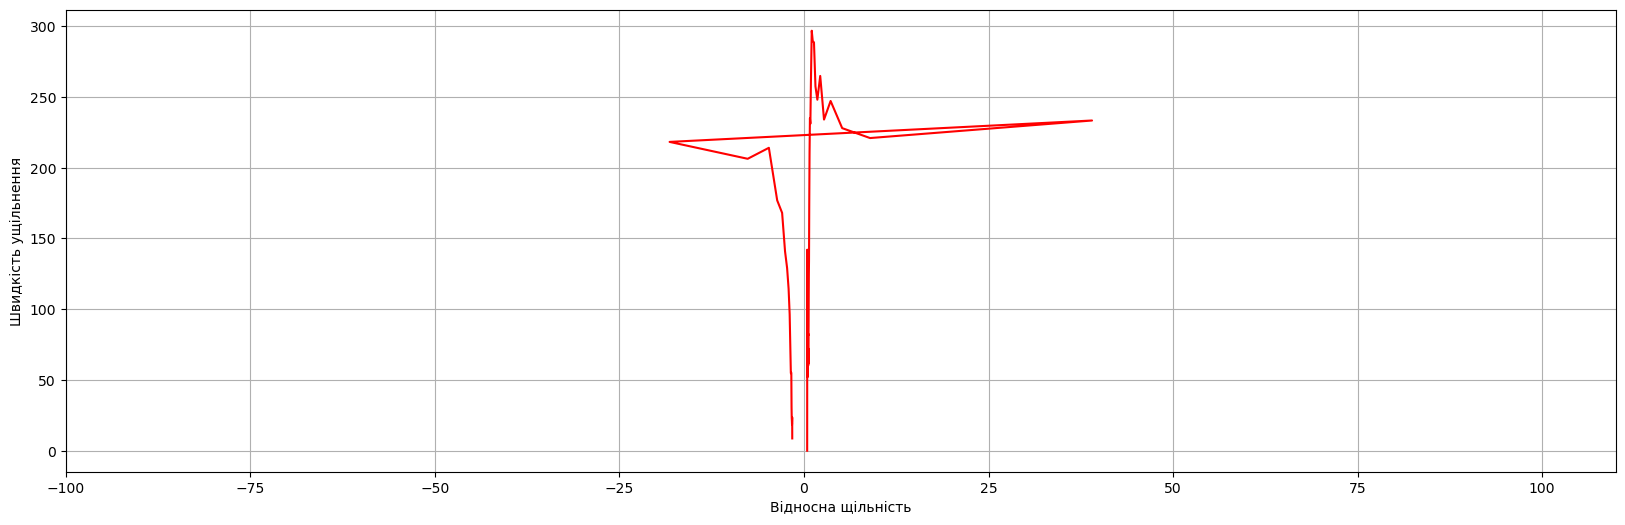

In [31]:


plt.figure(figsize=(40, 6))
fig, ax1 = plt.subplots( figsize=(20, 6))
sc = ax1.plot(data100_1500_32['Density'], data100_1500_32['TravelDelta'], color='red')
# Add color bar to show the color scale
ax1.set_ylabel('Швидкість ущільнення')
#ax1.set_ylim(400, 1000)
ax1.set_xlim(-100, 110)
#ax1.set_title('title')
ax1.set_xlabel('Відносна щільність')
ax1.grid(True)
plt.show()

In [6]:
def plot_data_Seconds(data, title):
    setToPlot = data.copy()
    plt.figure(figsize=(40, 6))
    fig, ax1 = plt.subplots( figsize=(40, 6))
    fig, ax2 = plt.subplots( figsize=(40, 6))
    fig, ax3 = plt.subplots( figsize=(40, 6))
    fig, ax4 = plt.subplots( figsize=(40, 6))
    sc2 = ax1.plot(setToPlot['seconds'], setToPlot['Force'], color='black')
    sc2 = ax2.plot(setToPlot['seconds'], setToPlot['TravelRelativeTempCorrected'], color='green')
    sc2 = ax2.plot(setToPlot['seconds'], setToPlot['TravelRelative'], color='blue')
    sc2 = ax3.plot(setToPlot['seconds'], setToPlot['Pyrometer'], color='orange')
    sc2 = ax4.plot(setToPlot['seconds'], setToPlot['Power'], color='red')
    sc2 = ax4.plot(setToPlot['seconds'], setToPlot['U RMS'], color='orange')
    sc2 = ax4.plot(setToPlot['seconds'], setToPlot['I RMS'], color='purple')
    sc2 = ax4.plot(setToPlot['seconds'], setToPlot['U RMS']/setToPlot['I RMS'], color='black')

    ax4.set_ylim(0,10)
    ax1.set_ylabel('Force')
    ax2.set_ylabel('TravelRelativeTempCorrected')
    ax3.set_ylabel('Pyrometer')
    ax4.set_ylabel('Power')
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)
    ax1.set_title(title)
    ax2.set_title(title)
    ax3.set_title(title)
    ax4.set_title(title)
    plt.show()

<Figure size 4000x600 with 0 Axes>

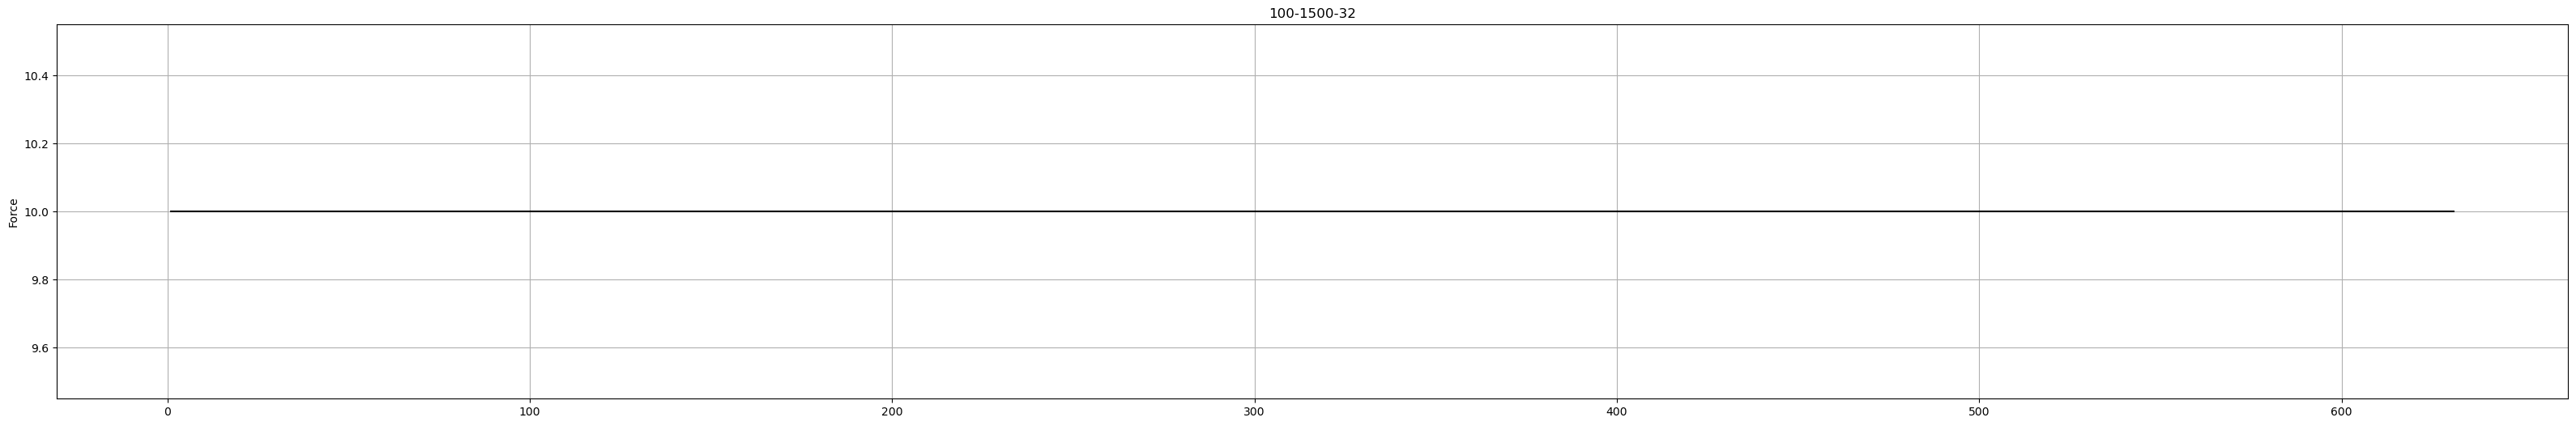

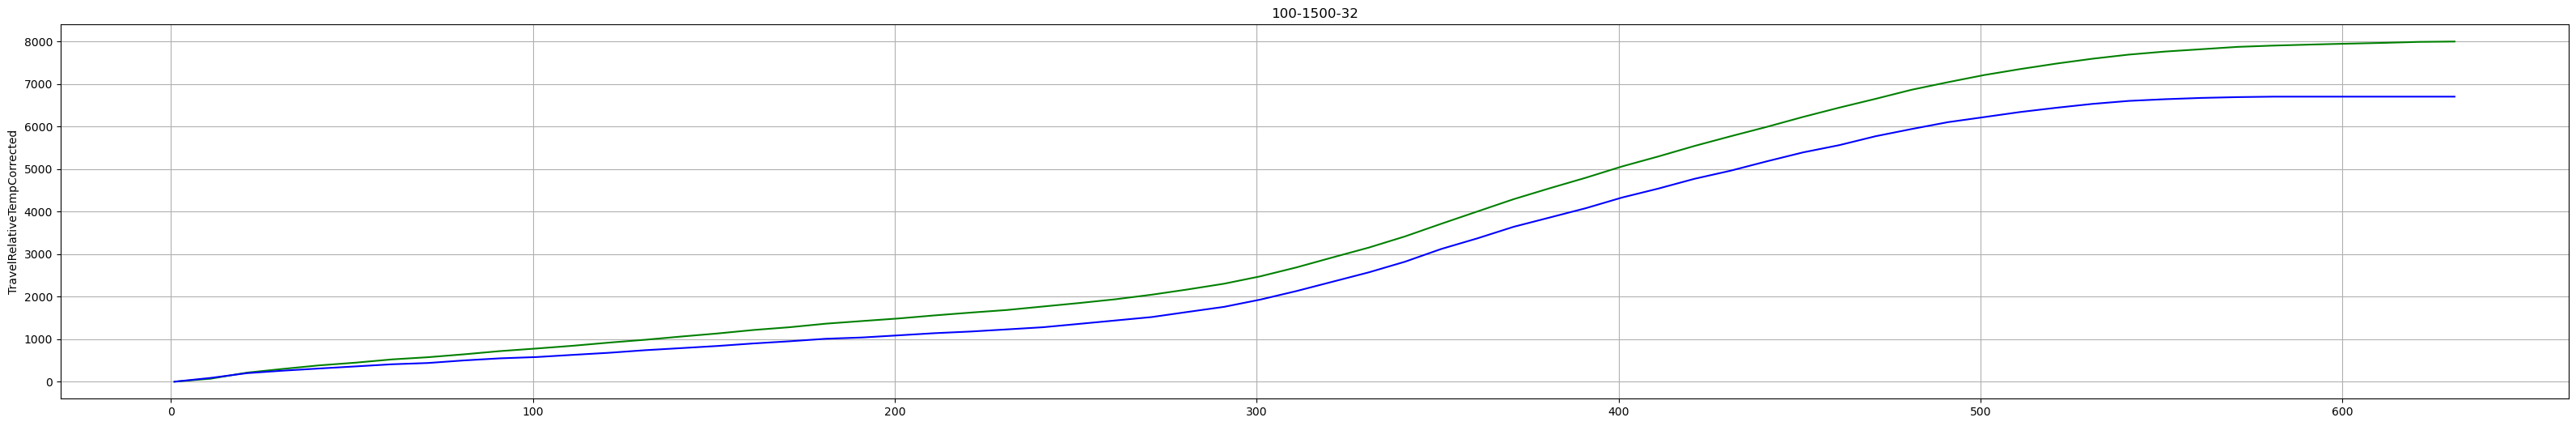

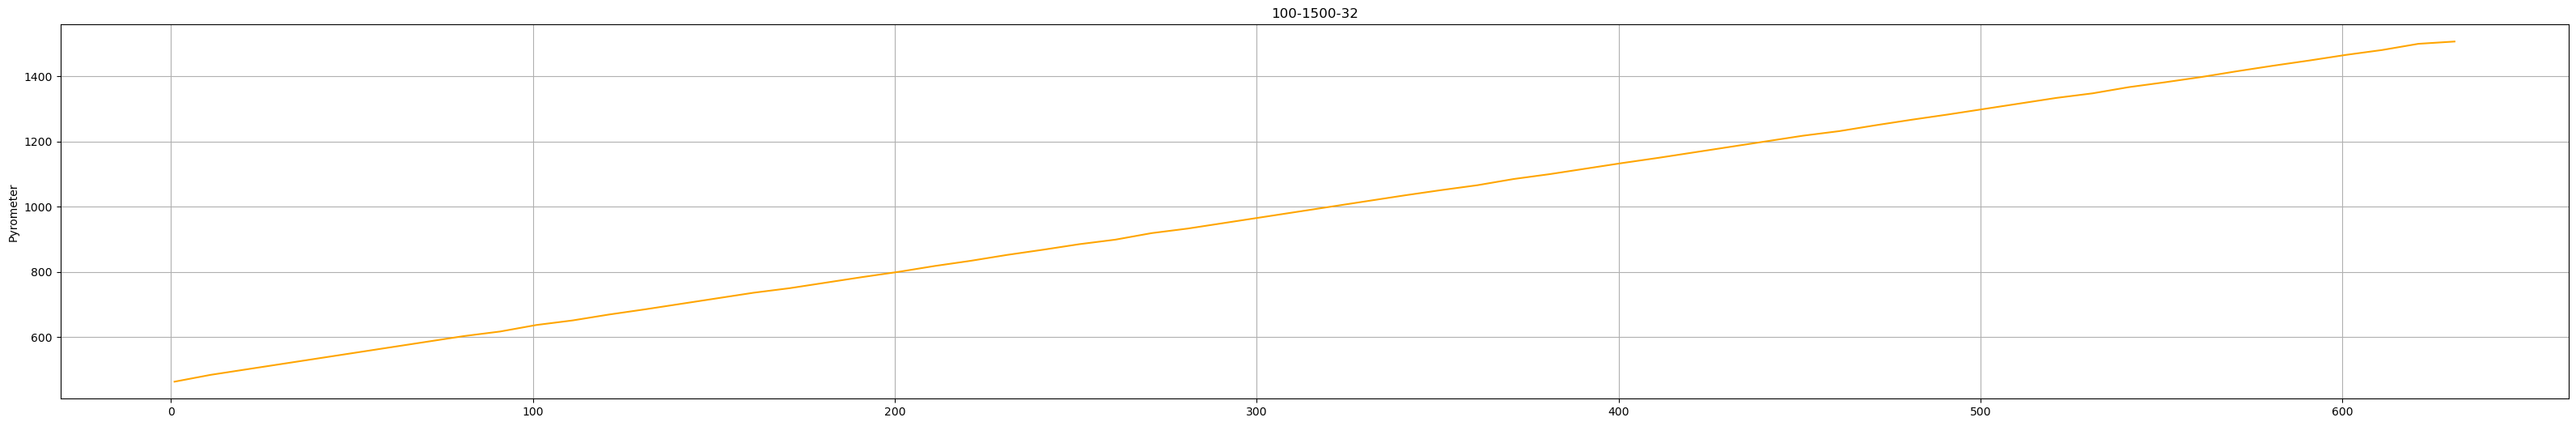

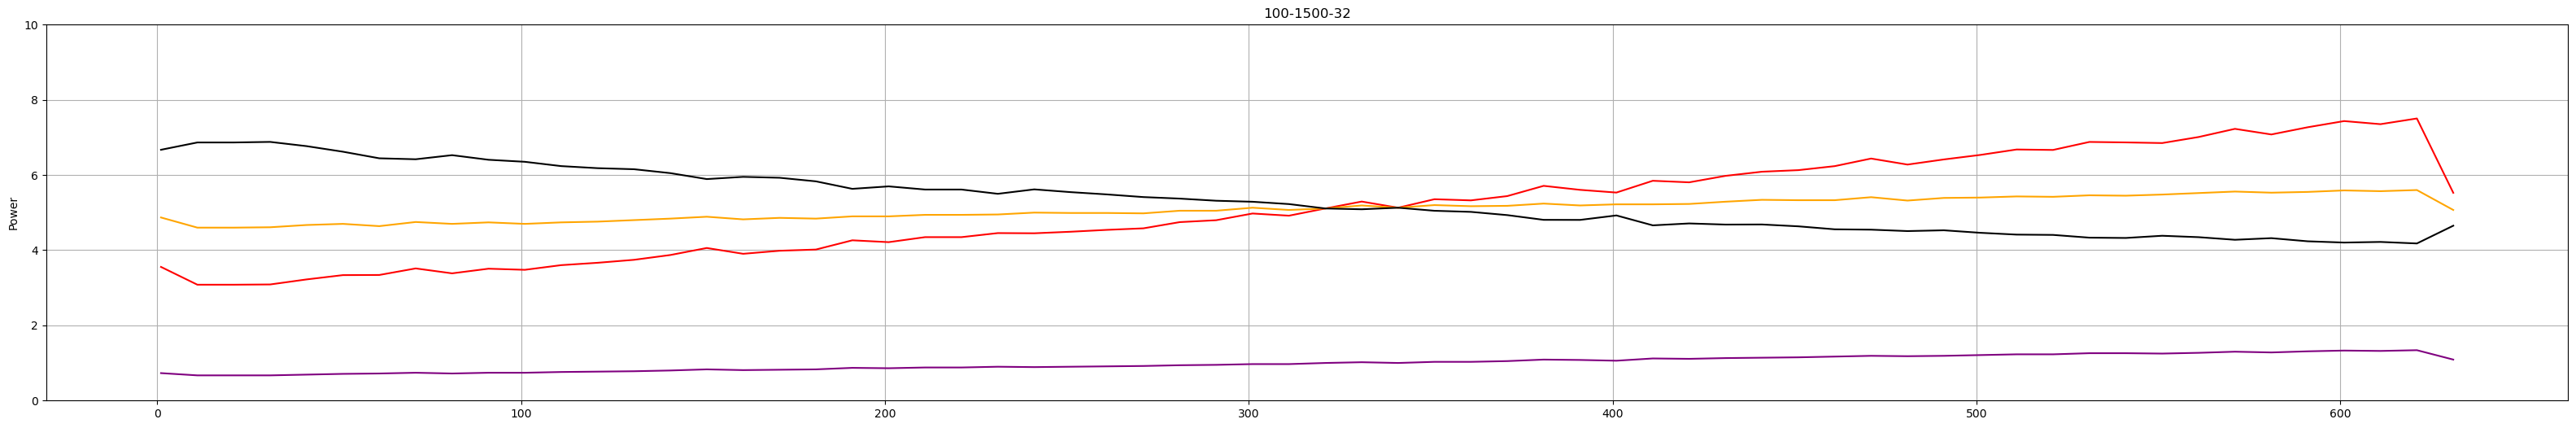

<Figure size 4000x600 with 0 Axes>

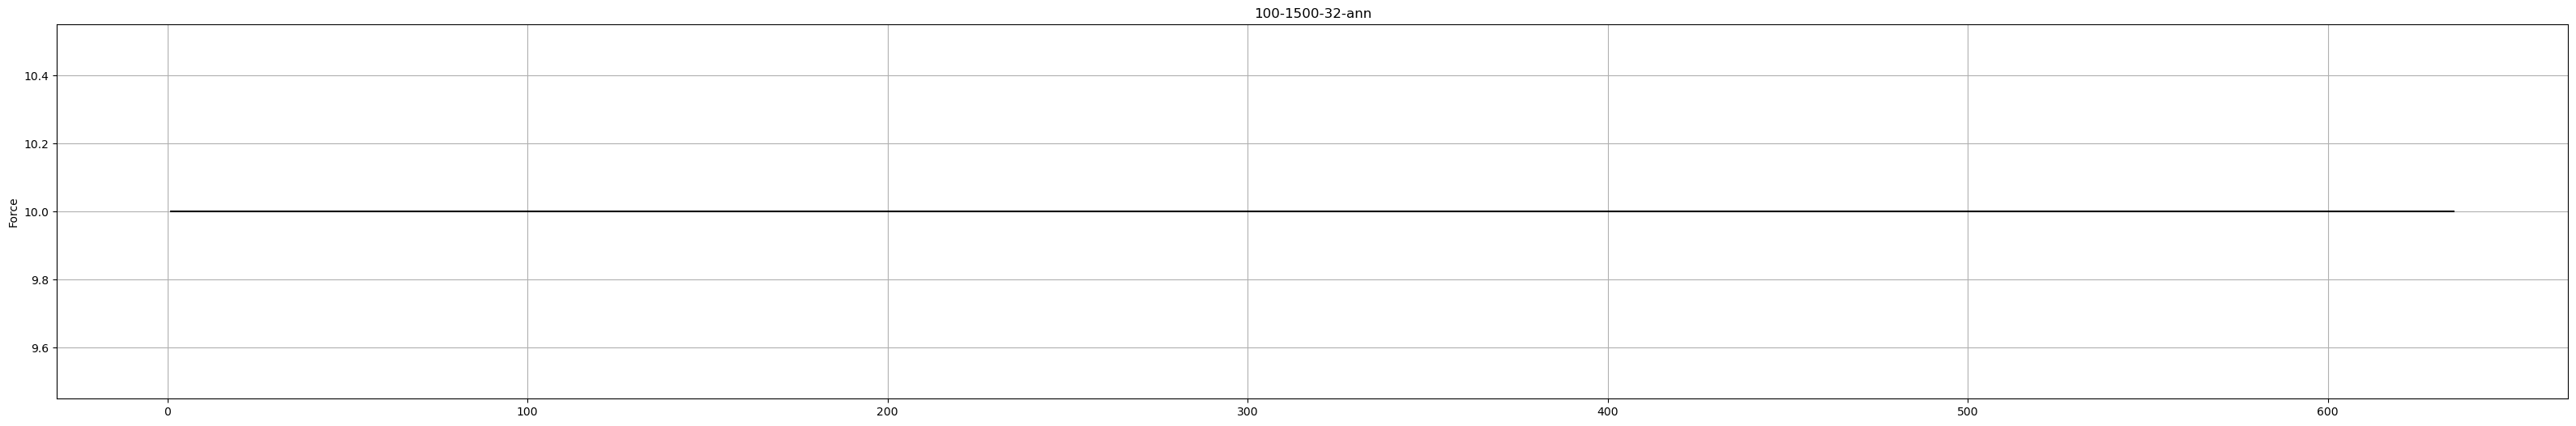

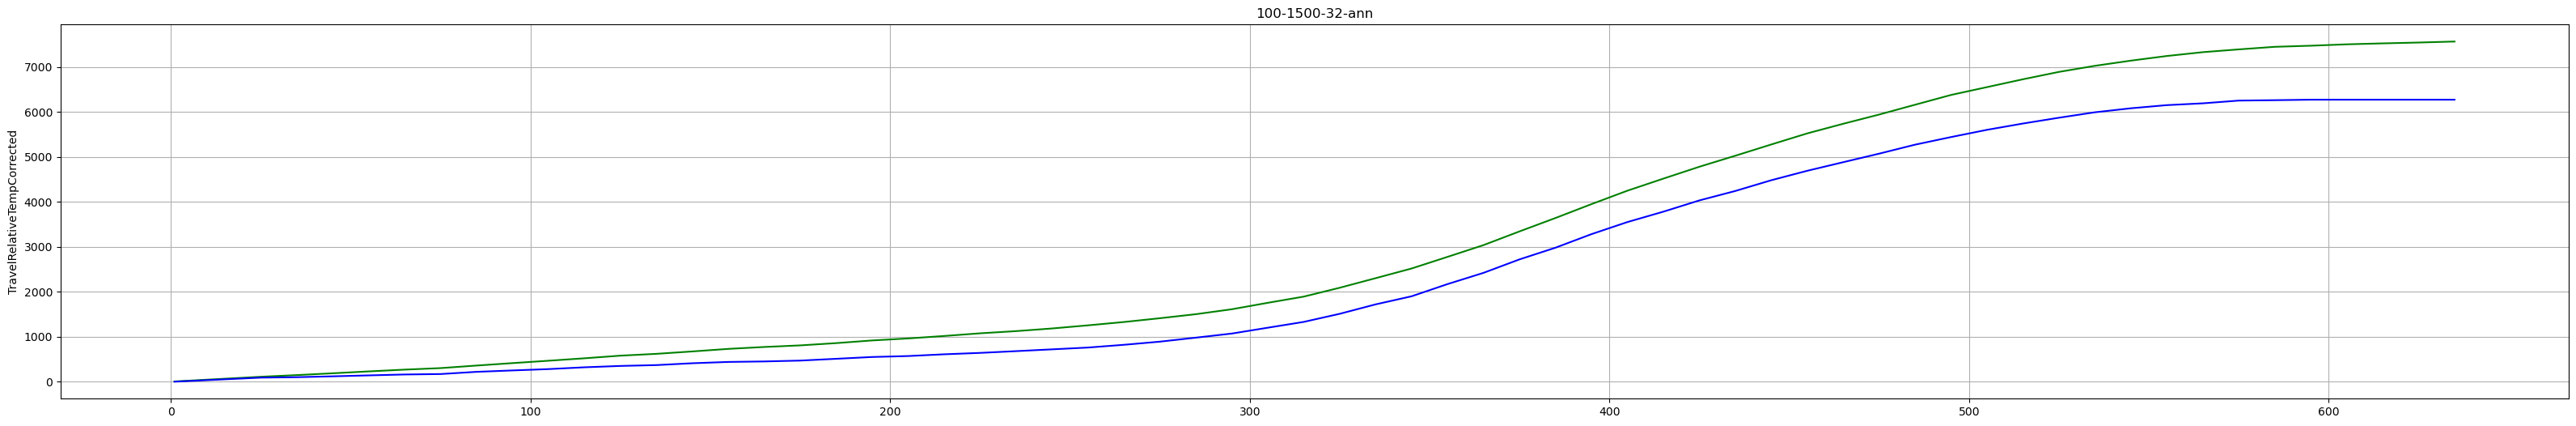

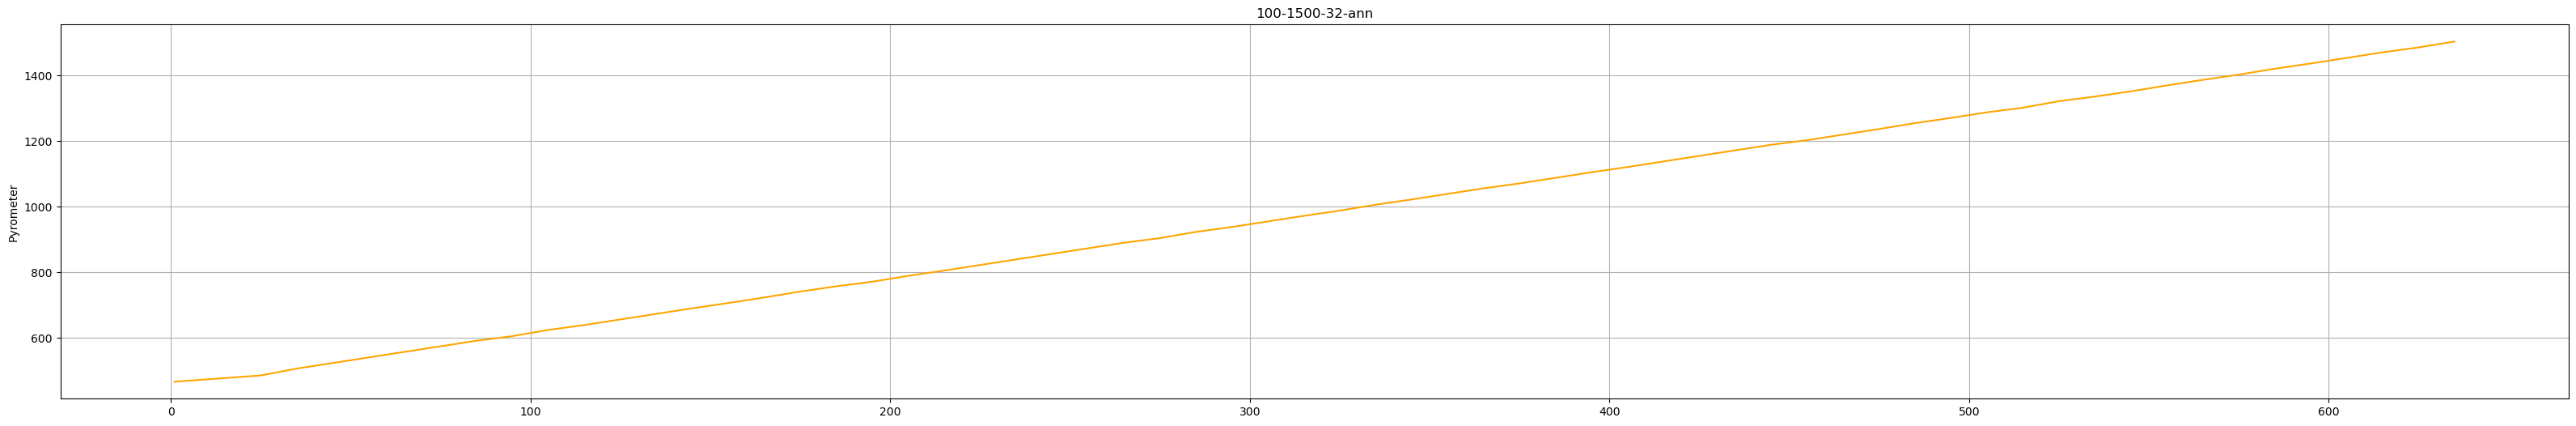

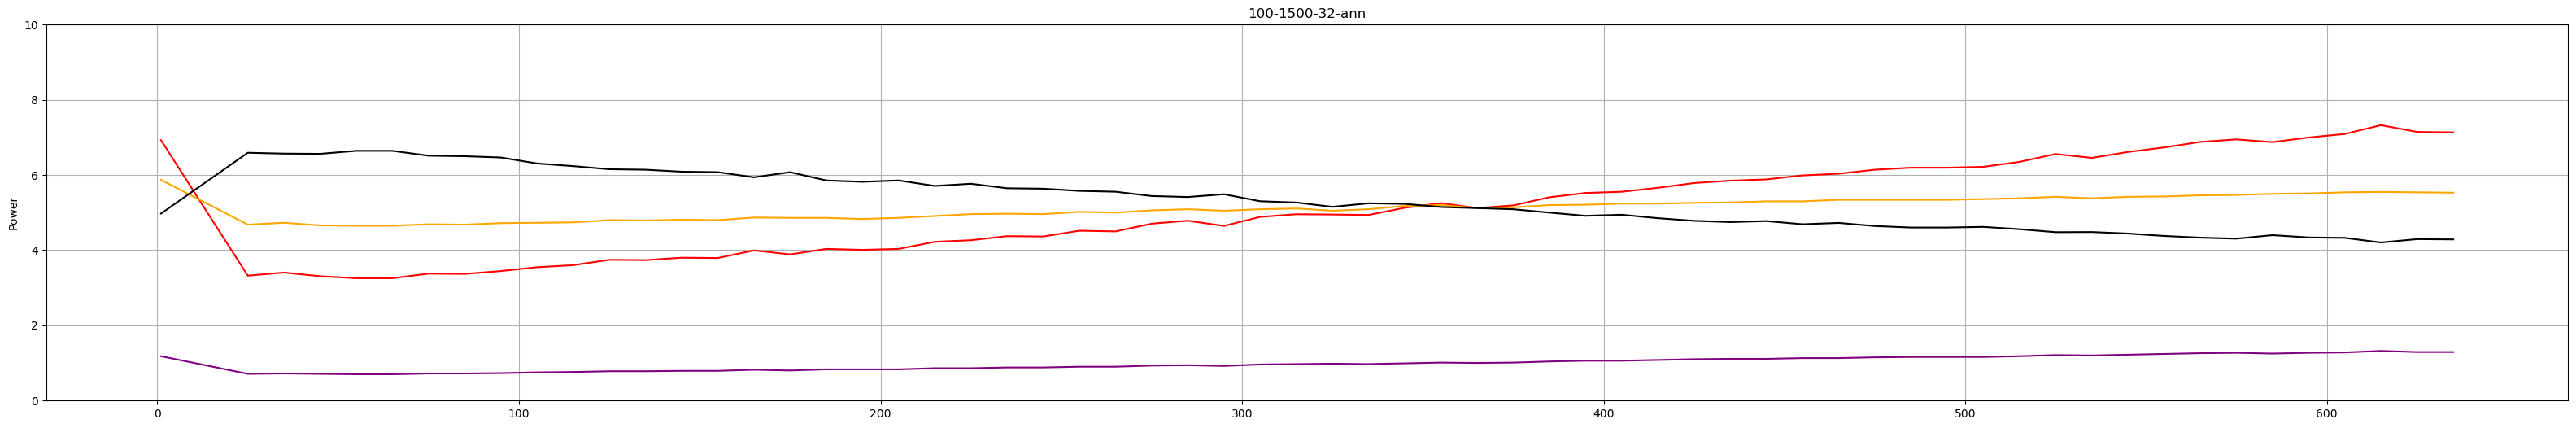

<Figure size 4000x600 with 0 Axes>

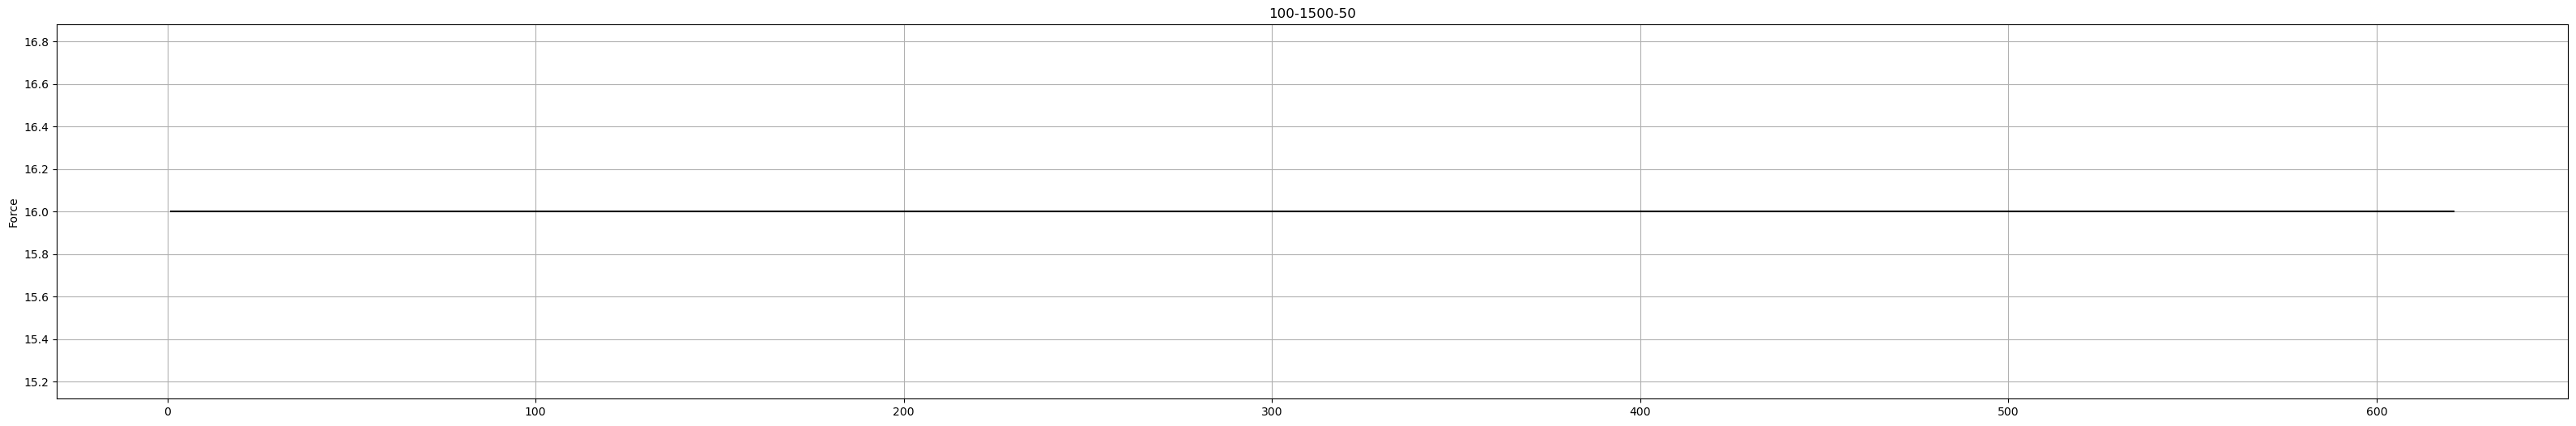

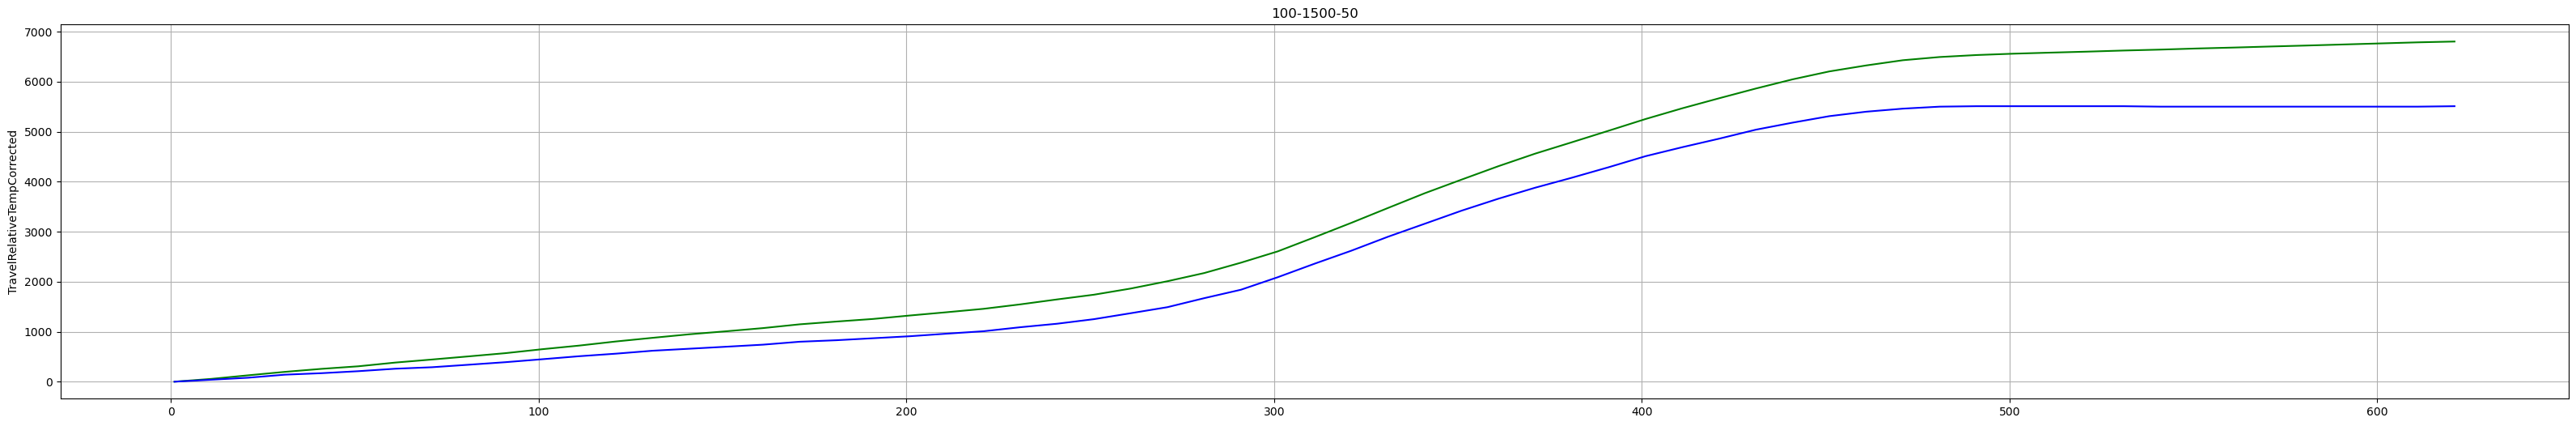

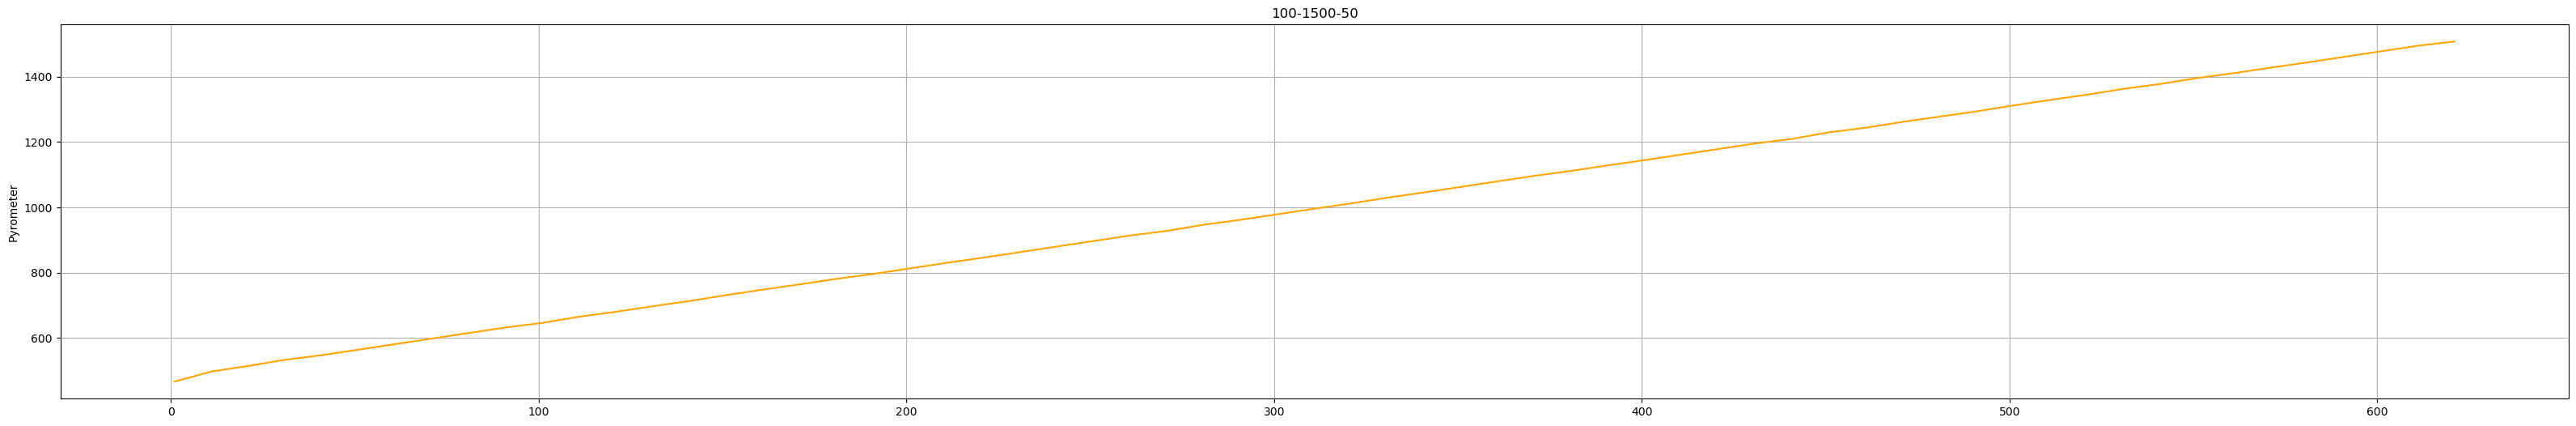

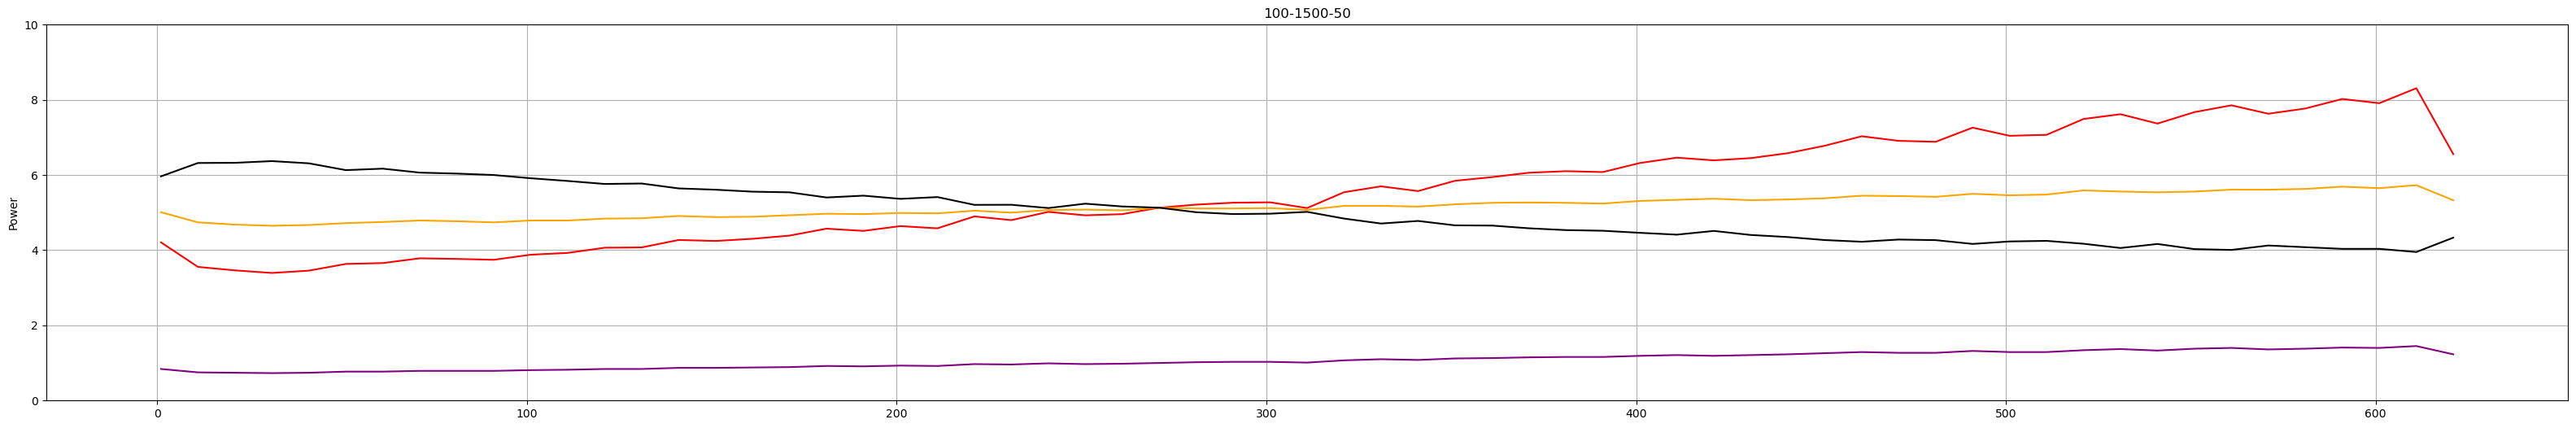

<Figure size 4000x600 with 0 Axes>

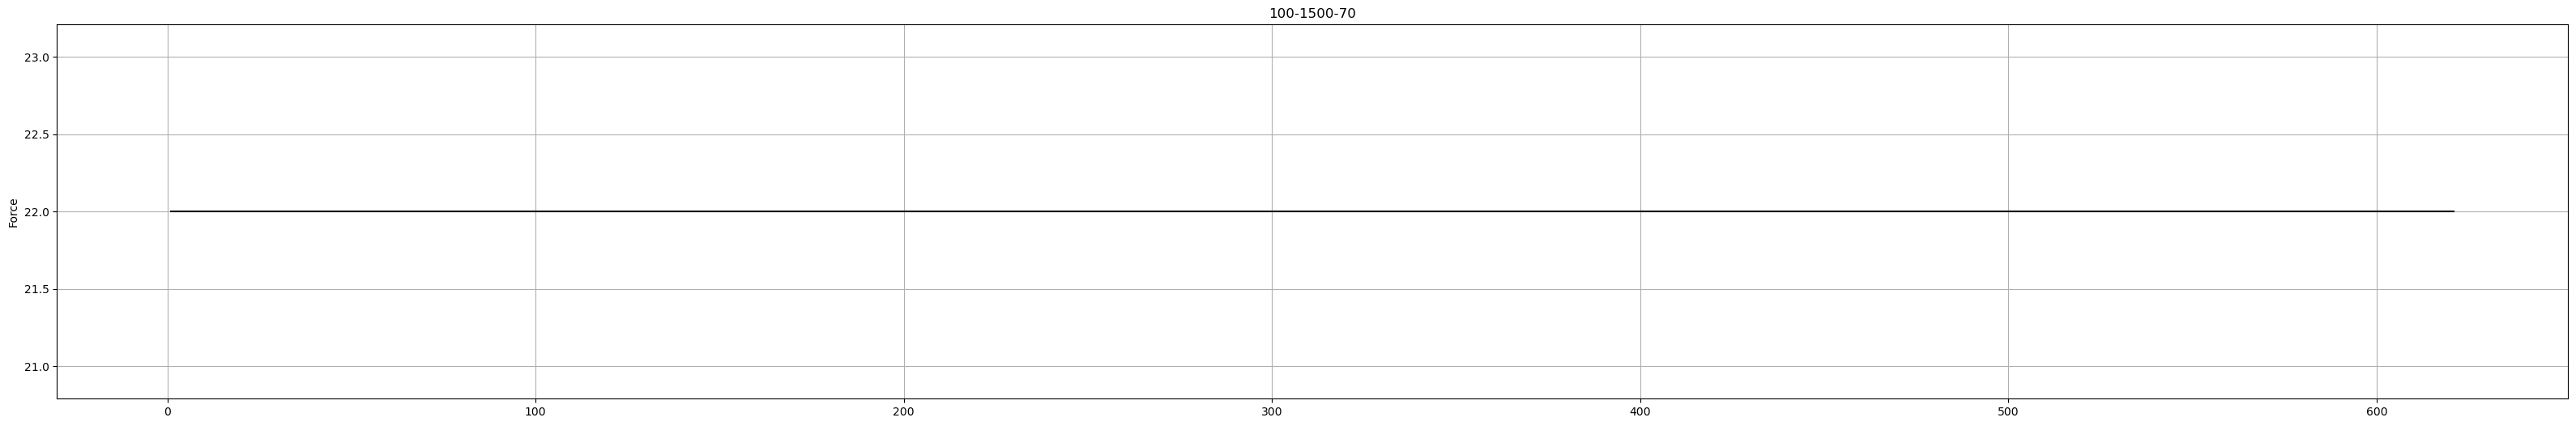

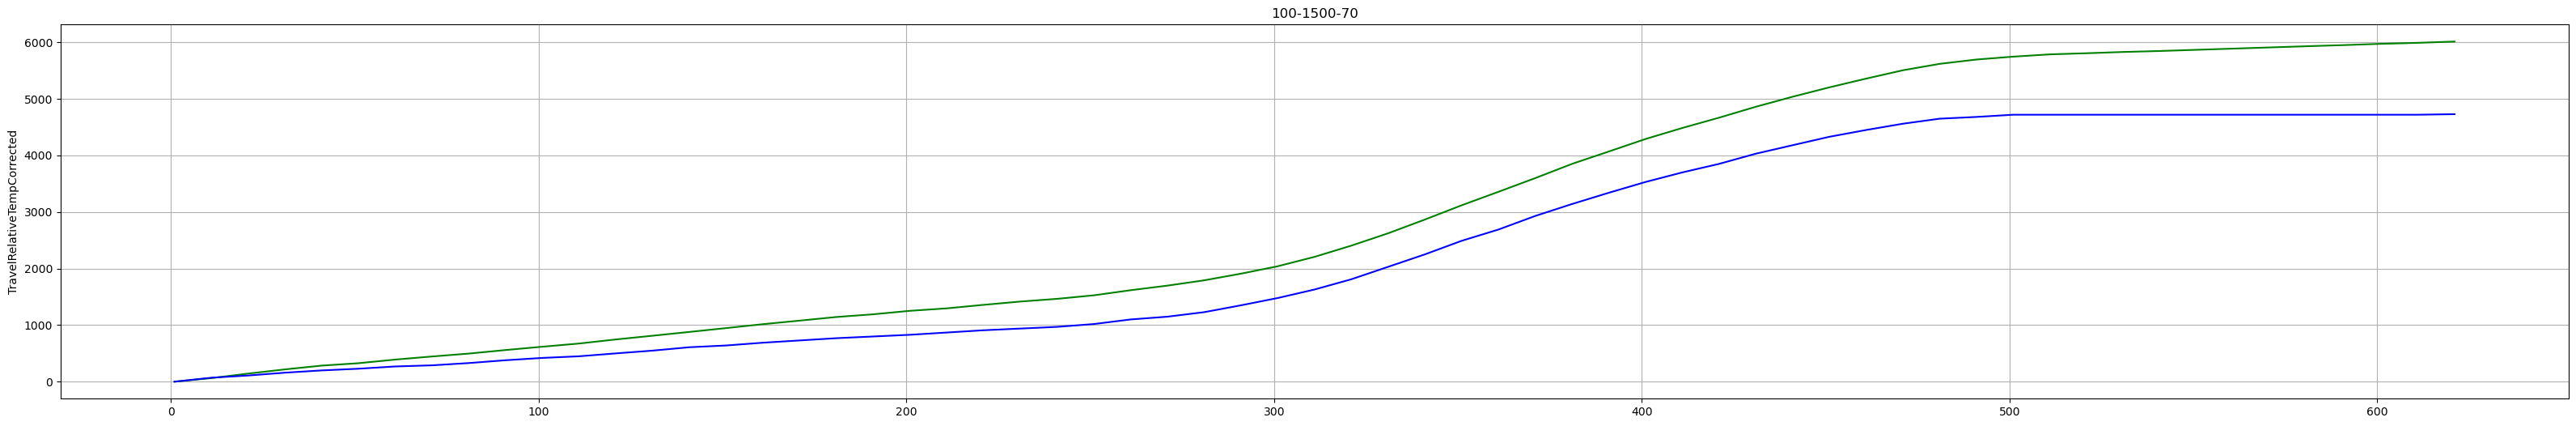

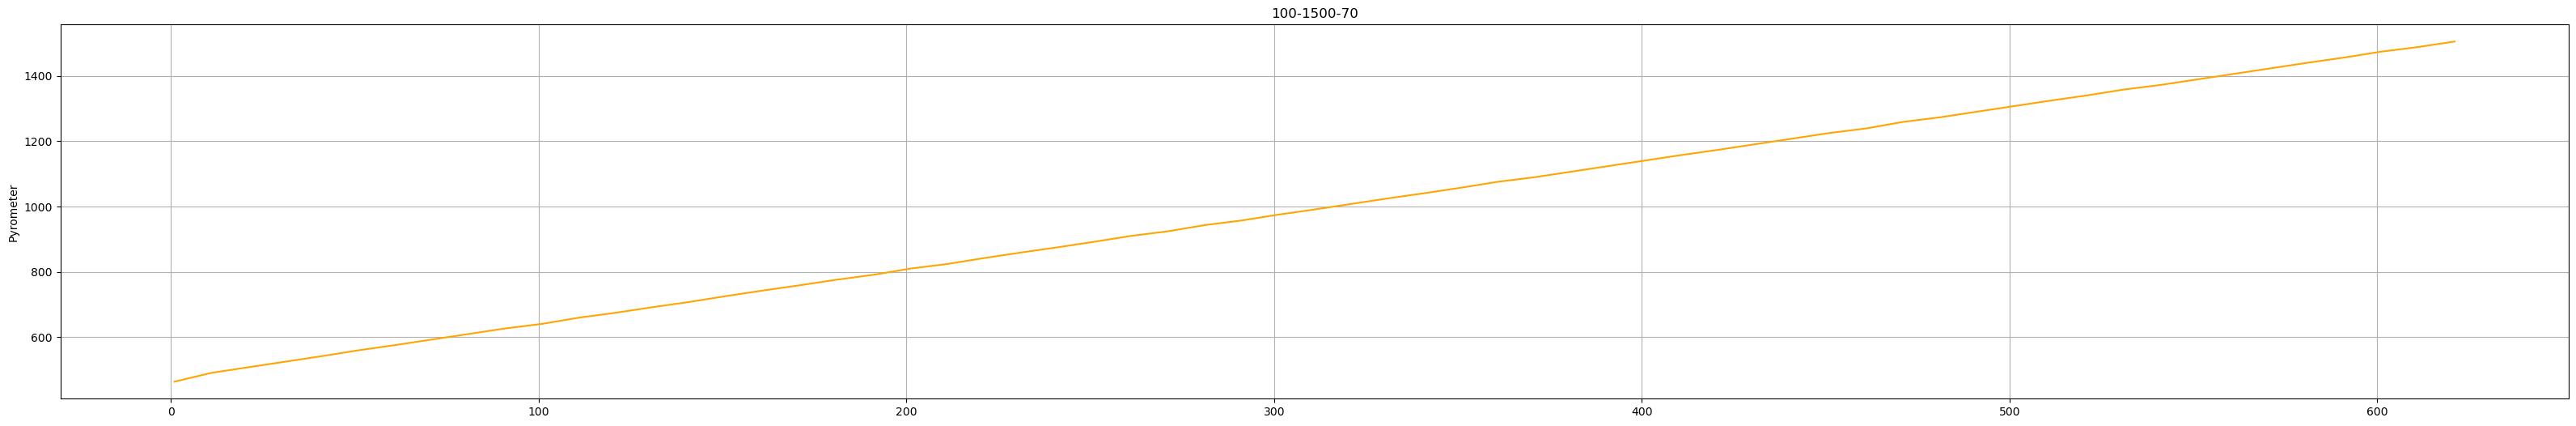

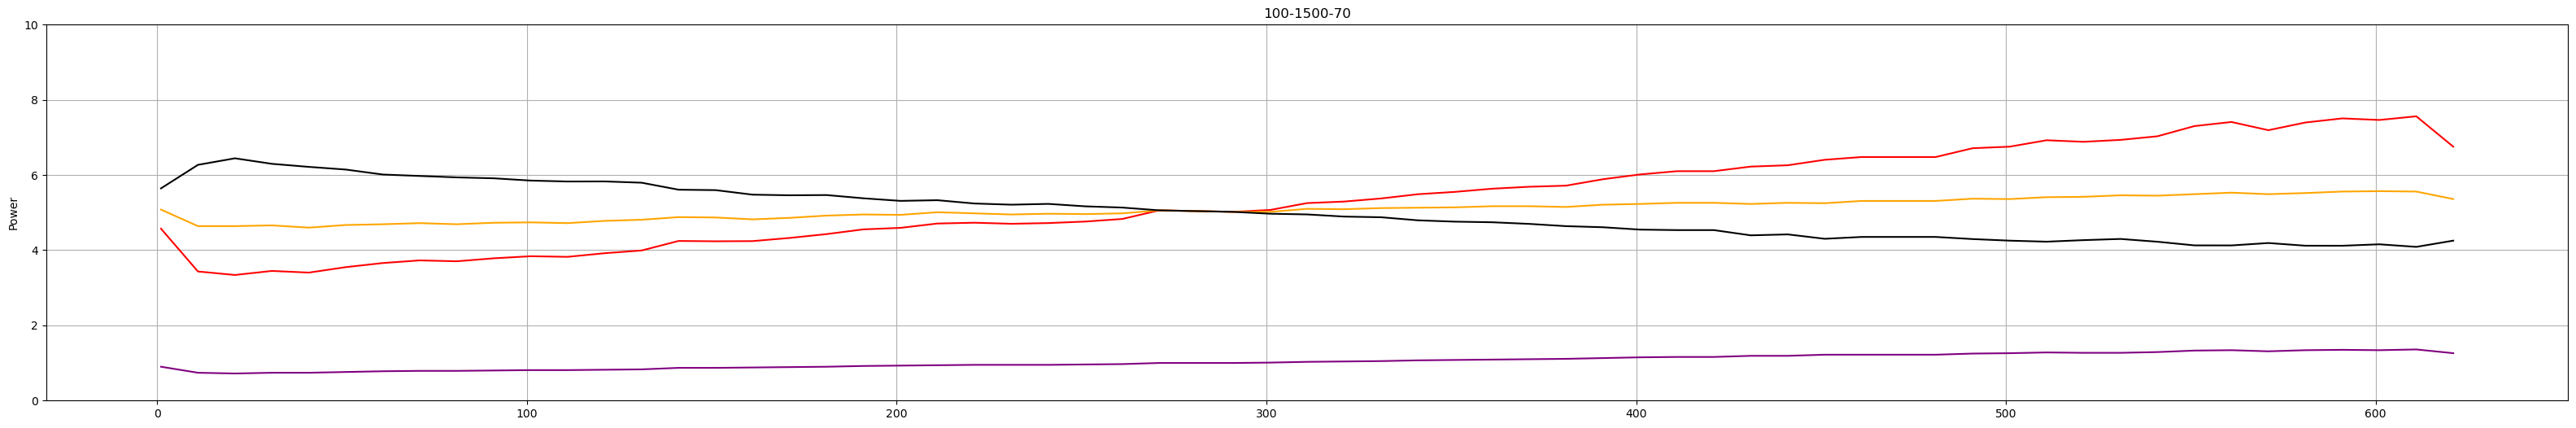

<Figure size 4000x600 with 0 Axes>

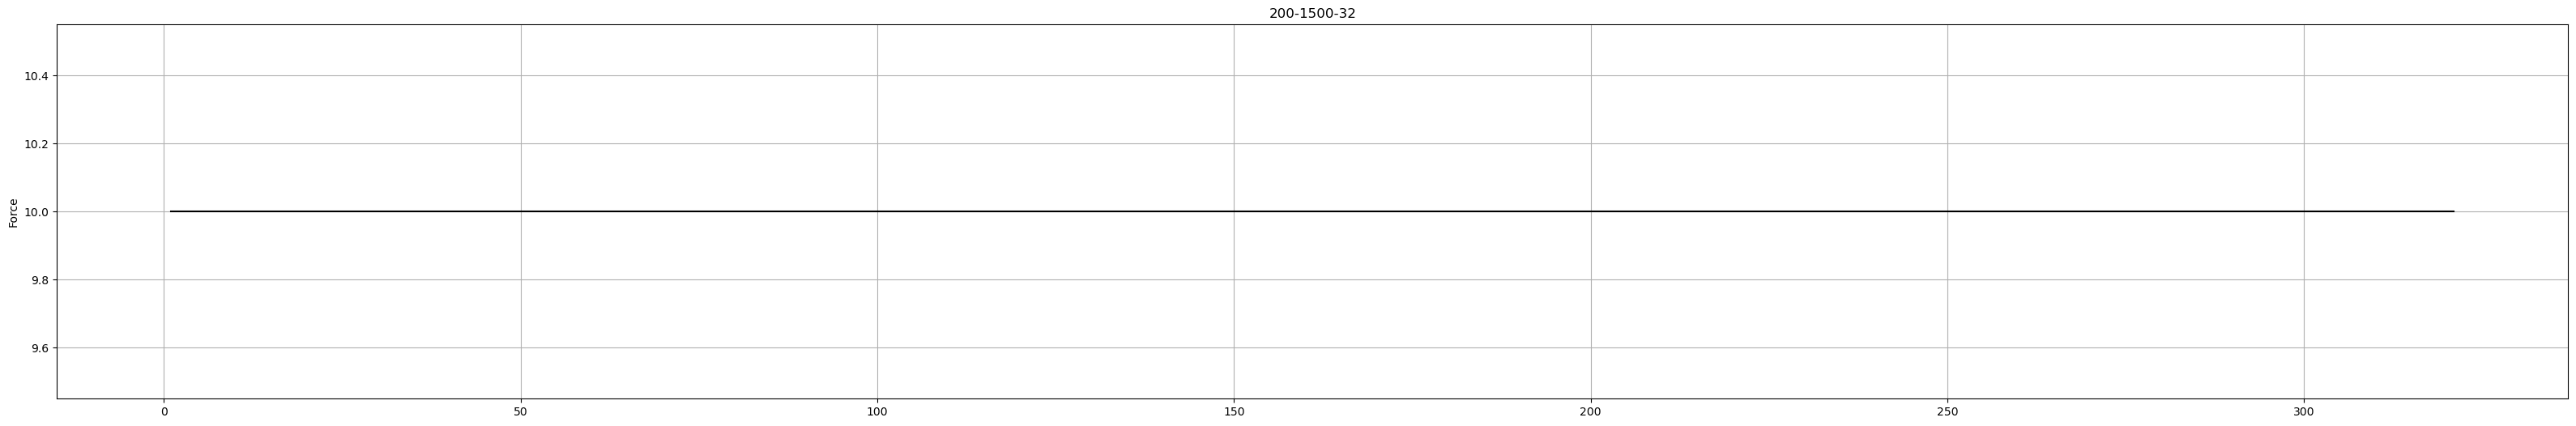

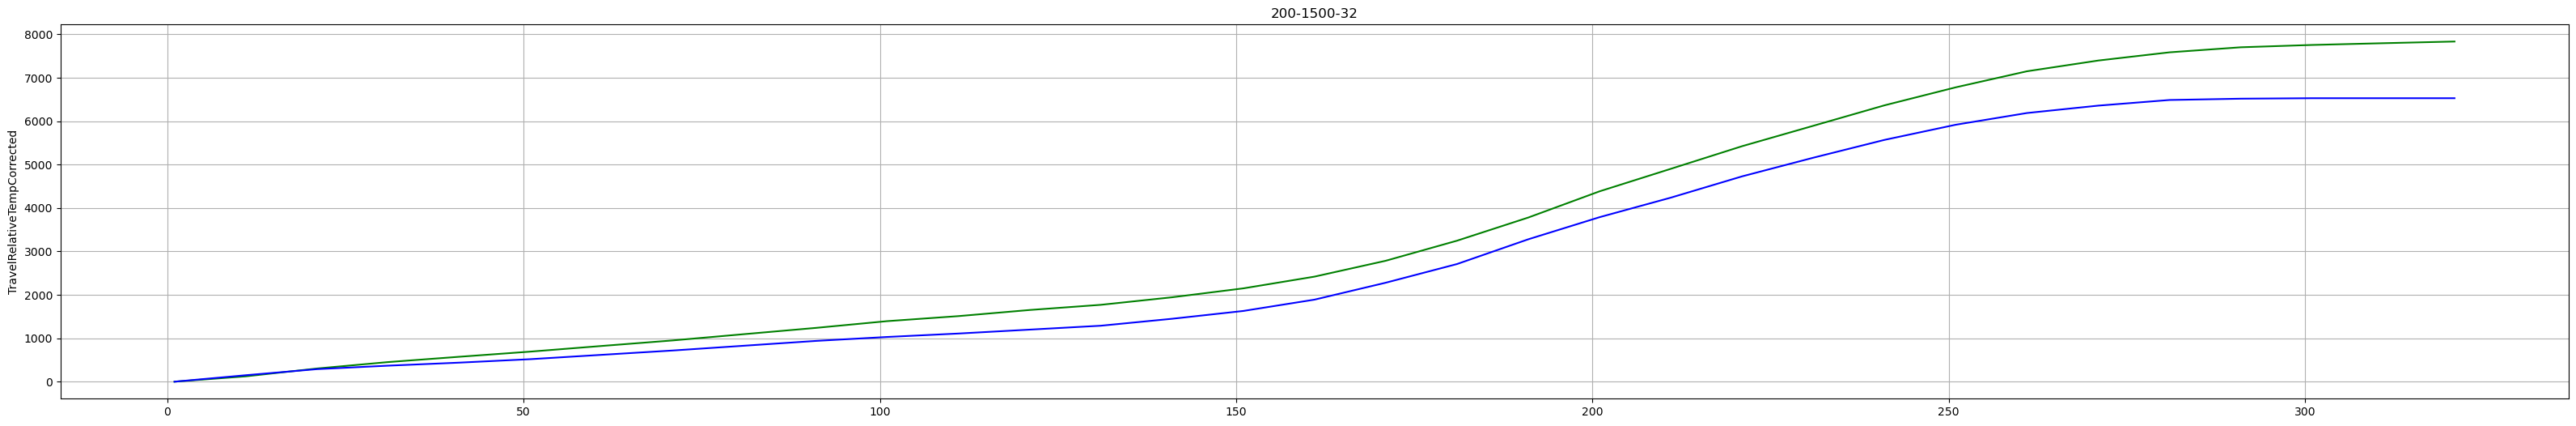

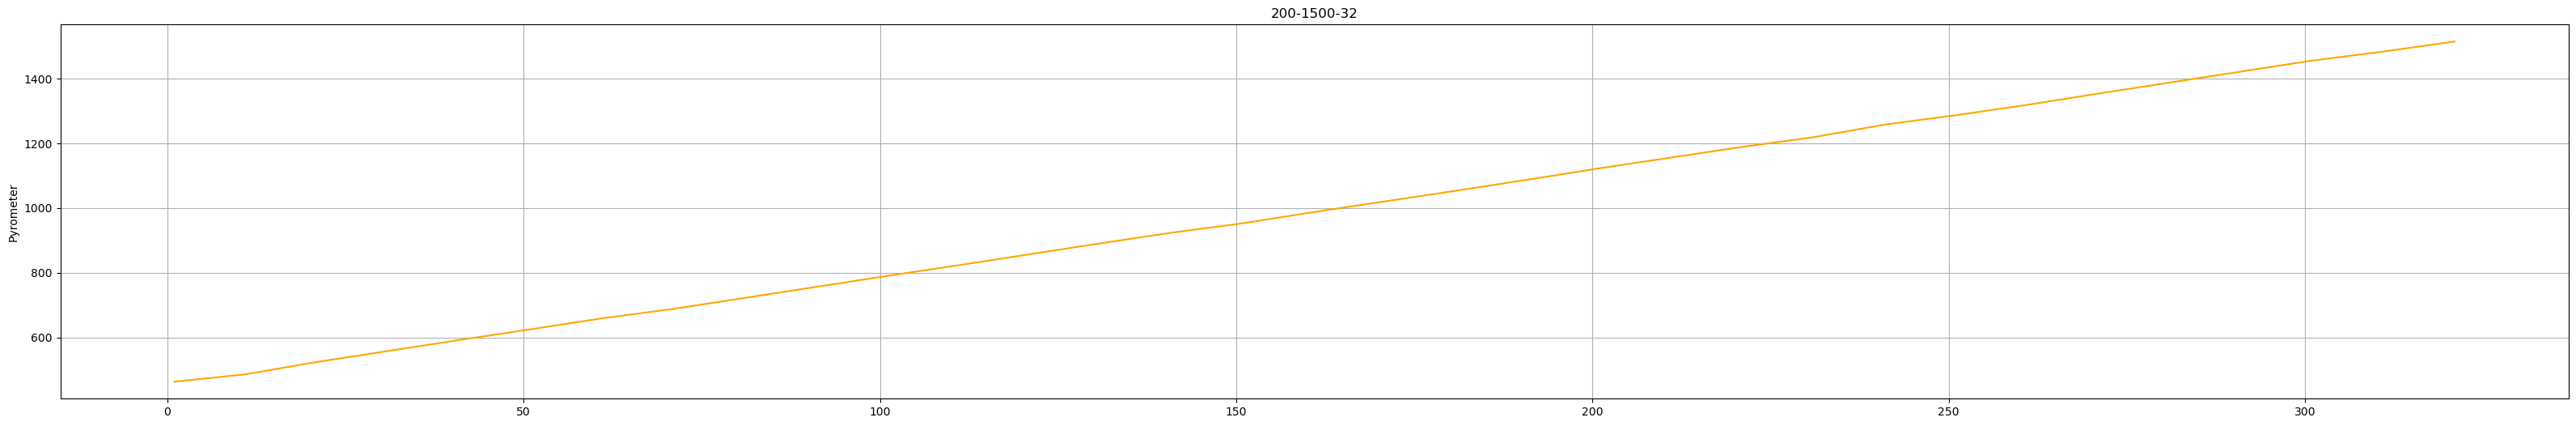

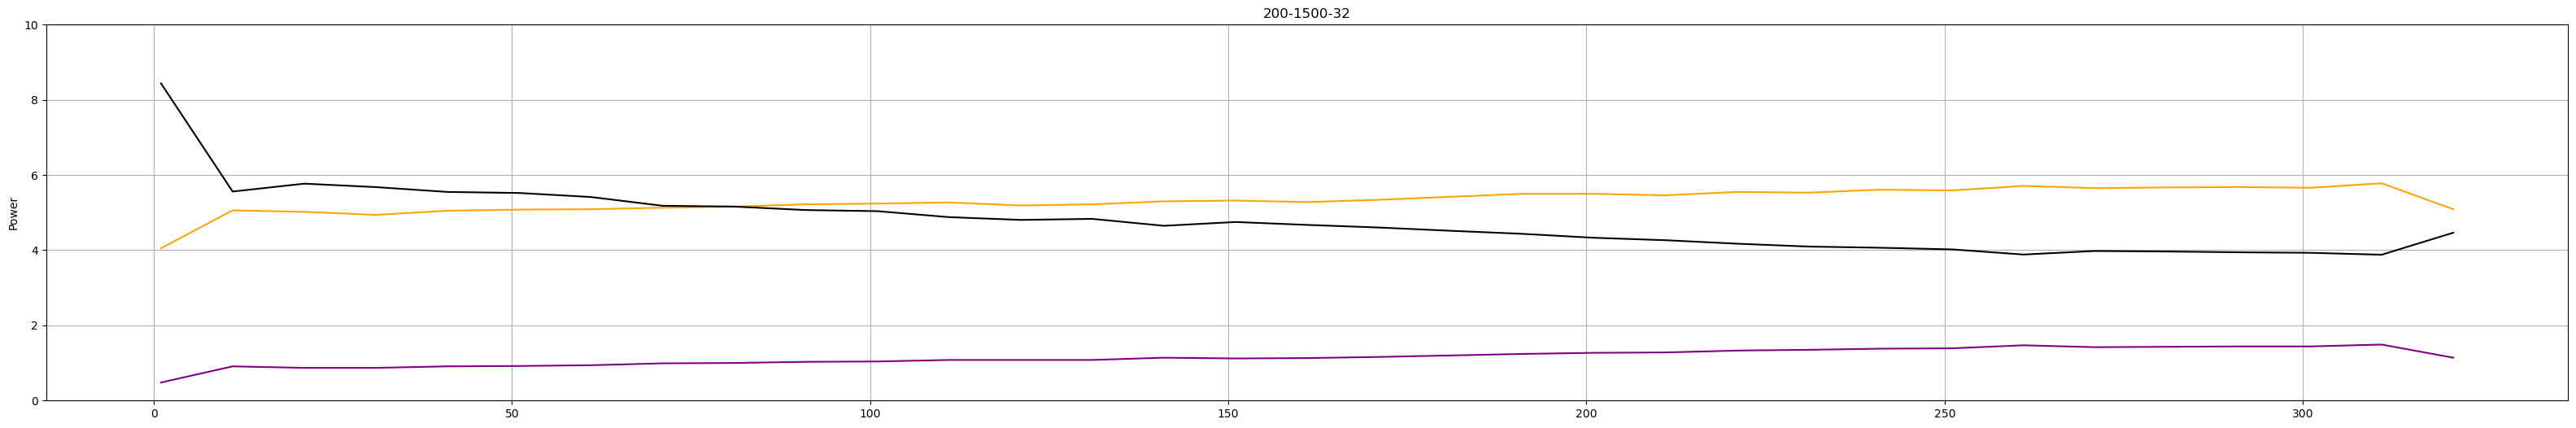

<Figure size 4000x600 with 0 Axes>

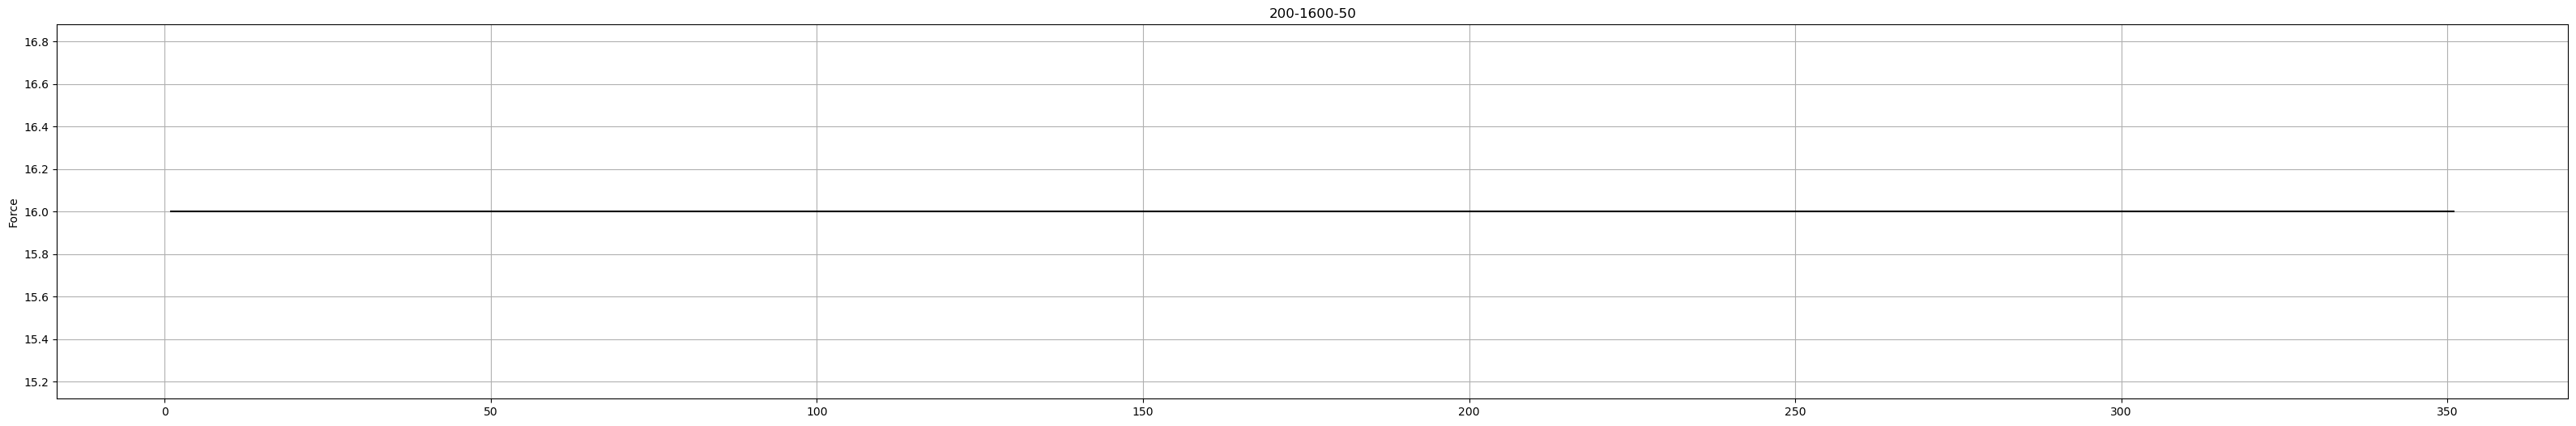

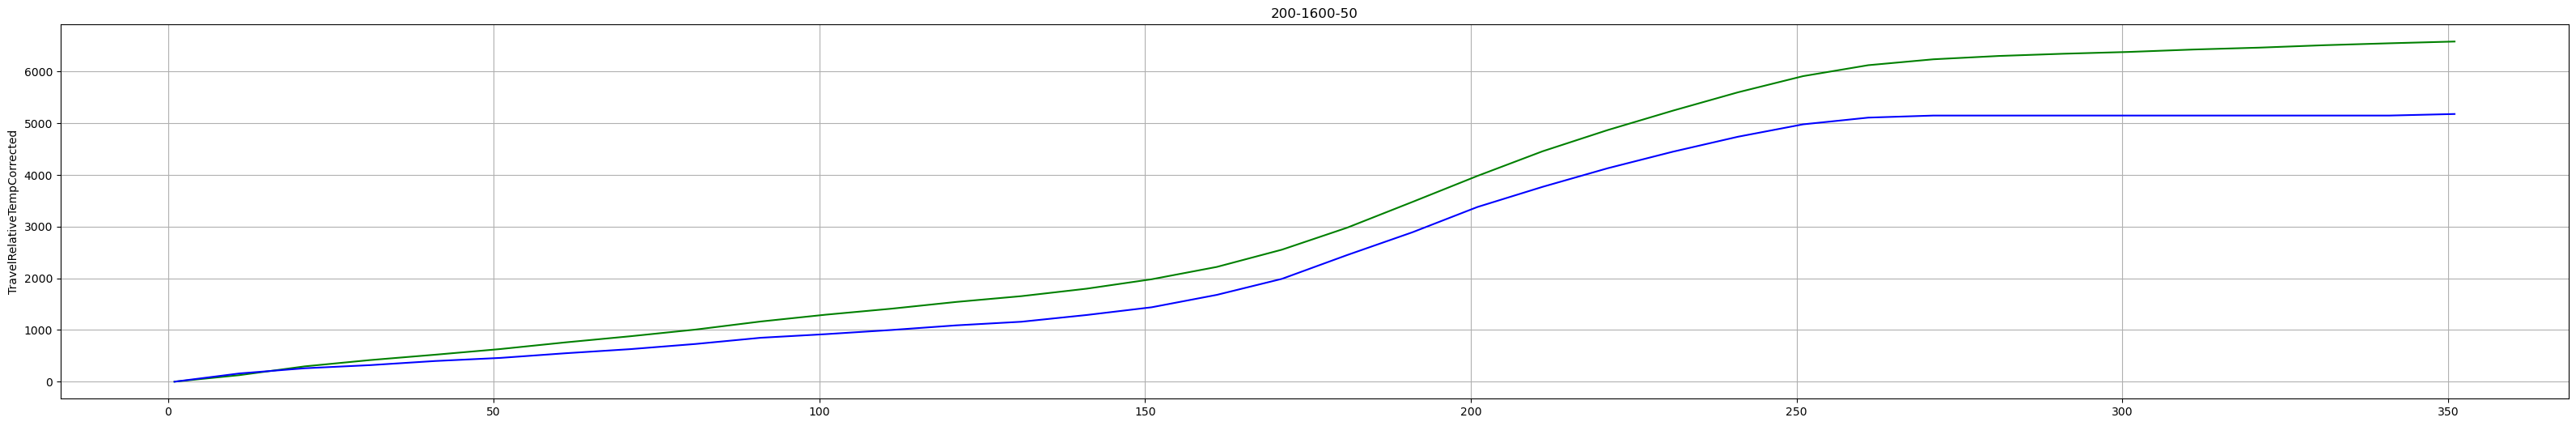

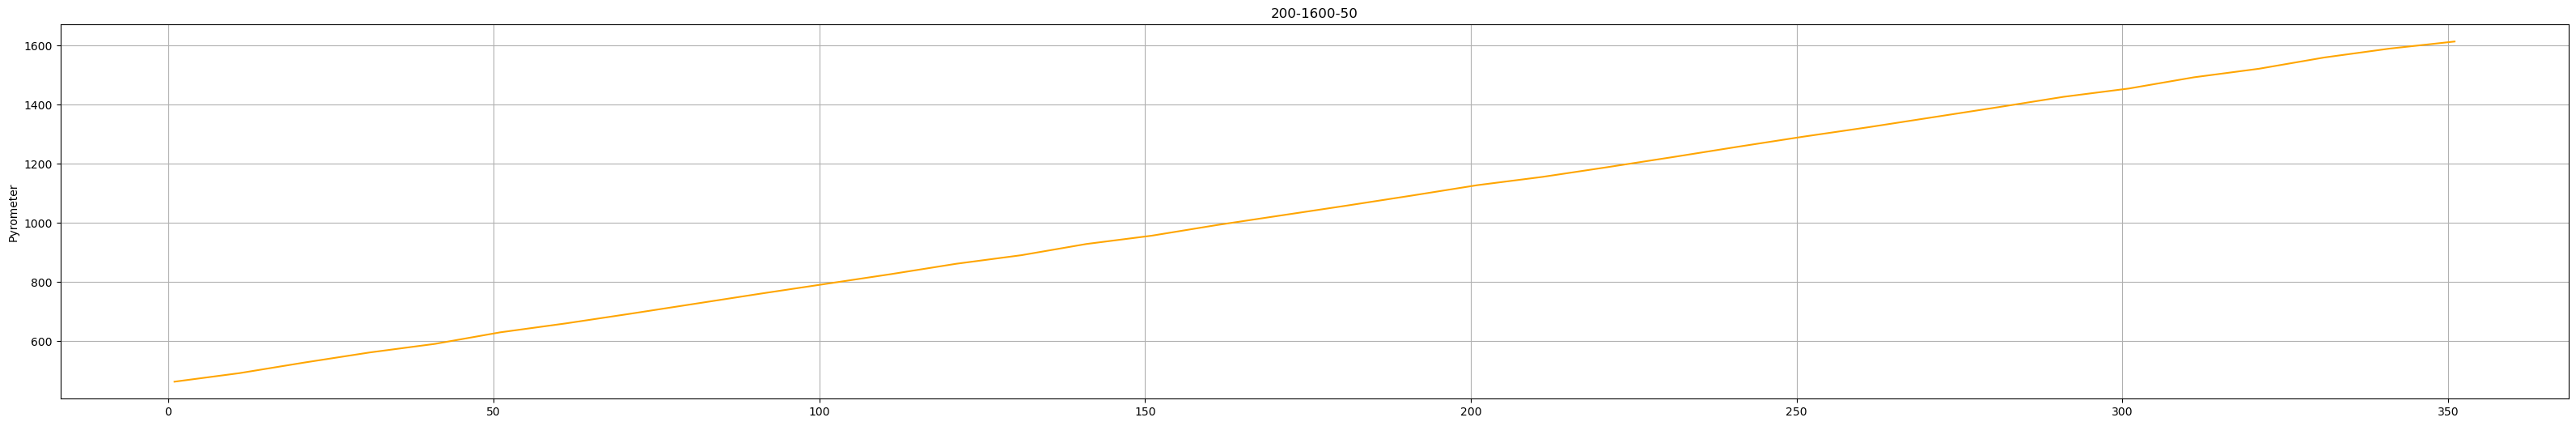

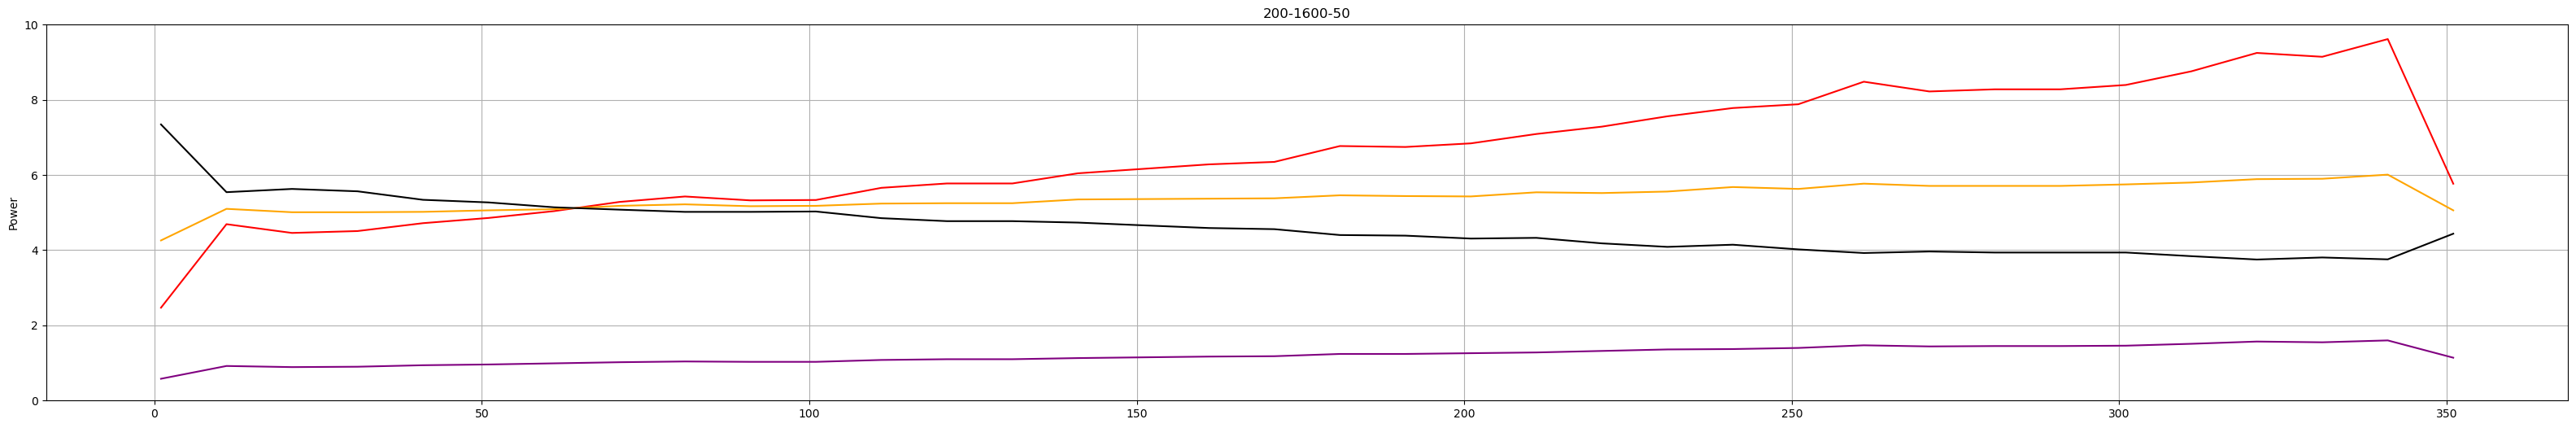

<Figure size 4000x600 with 0 Axes>

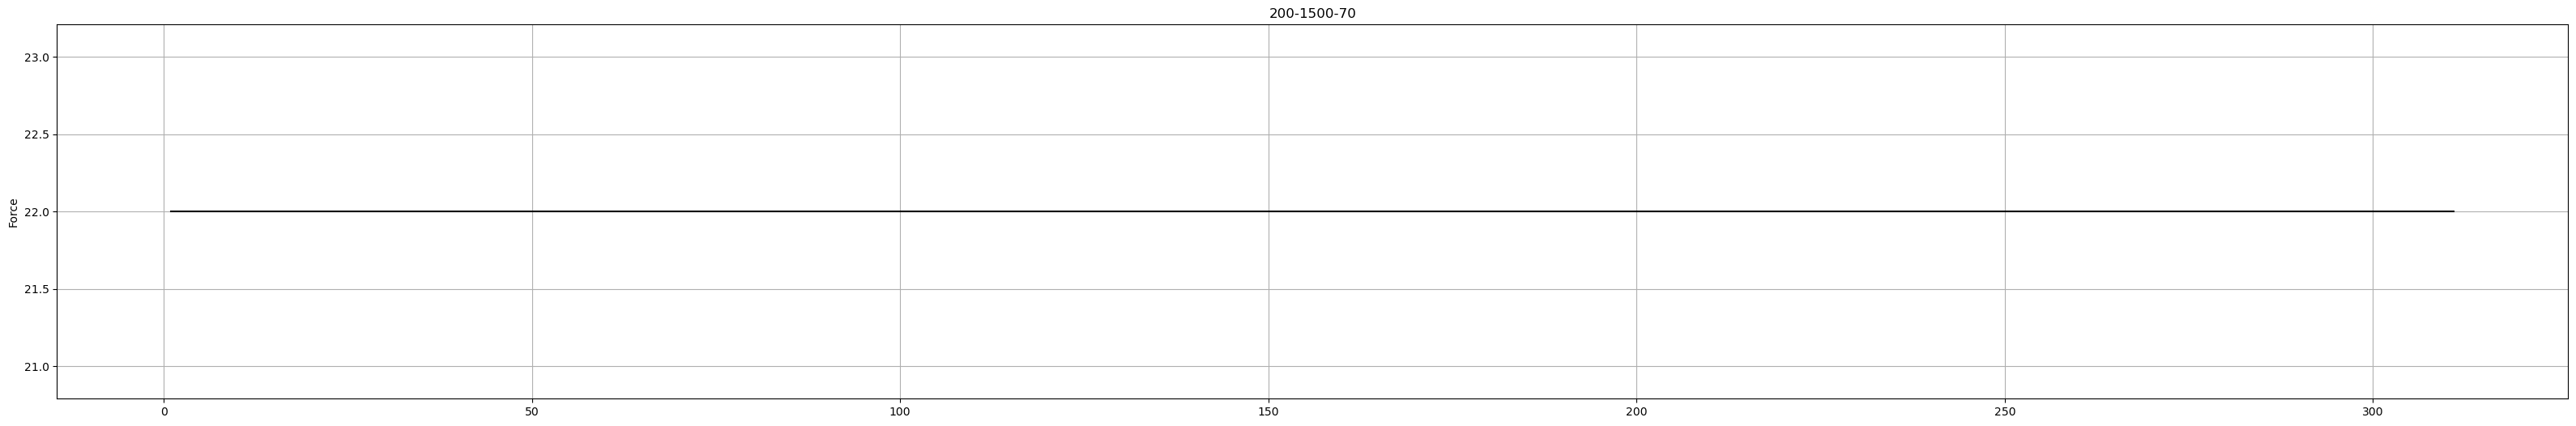

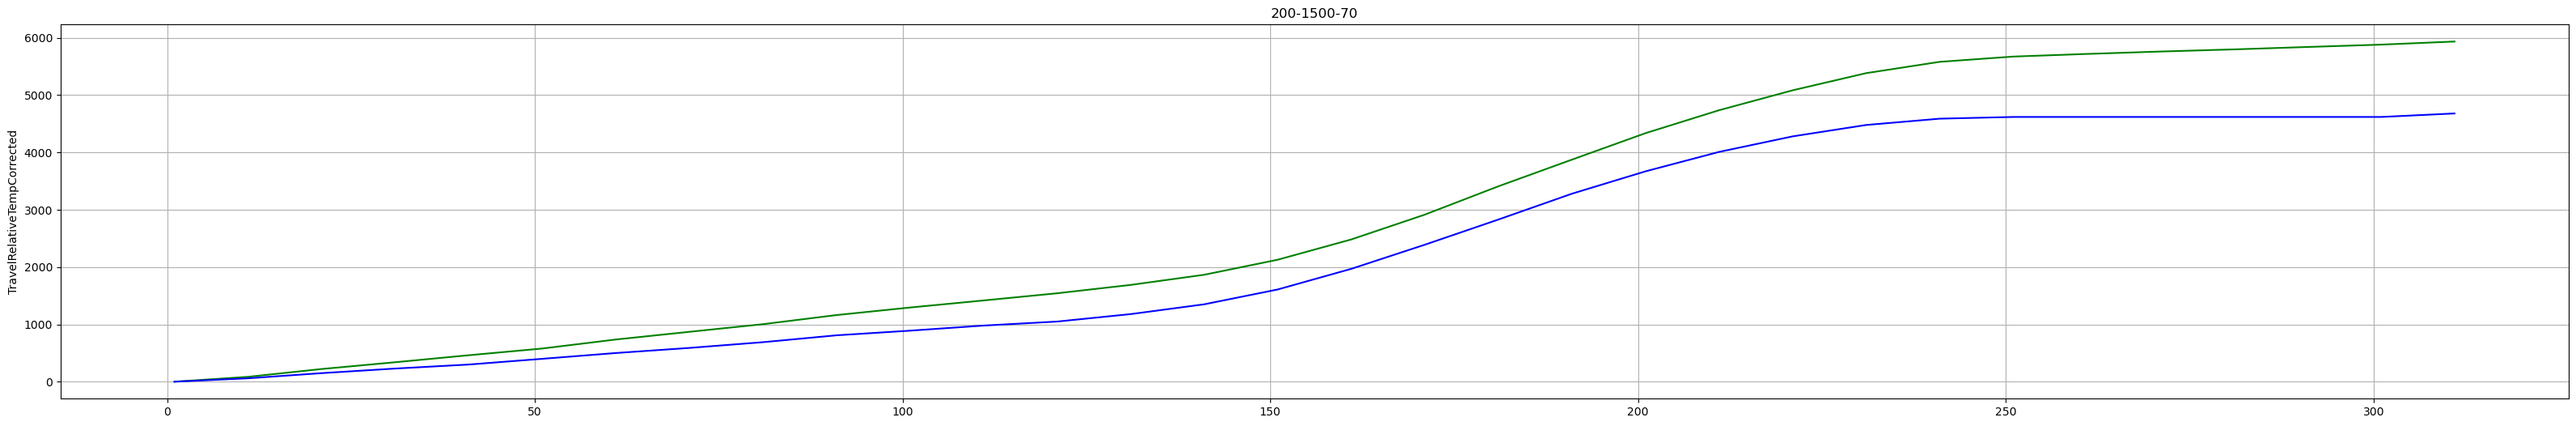

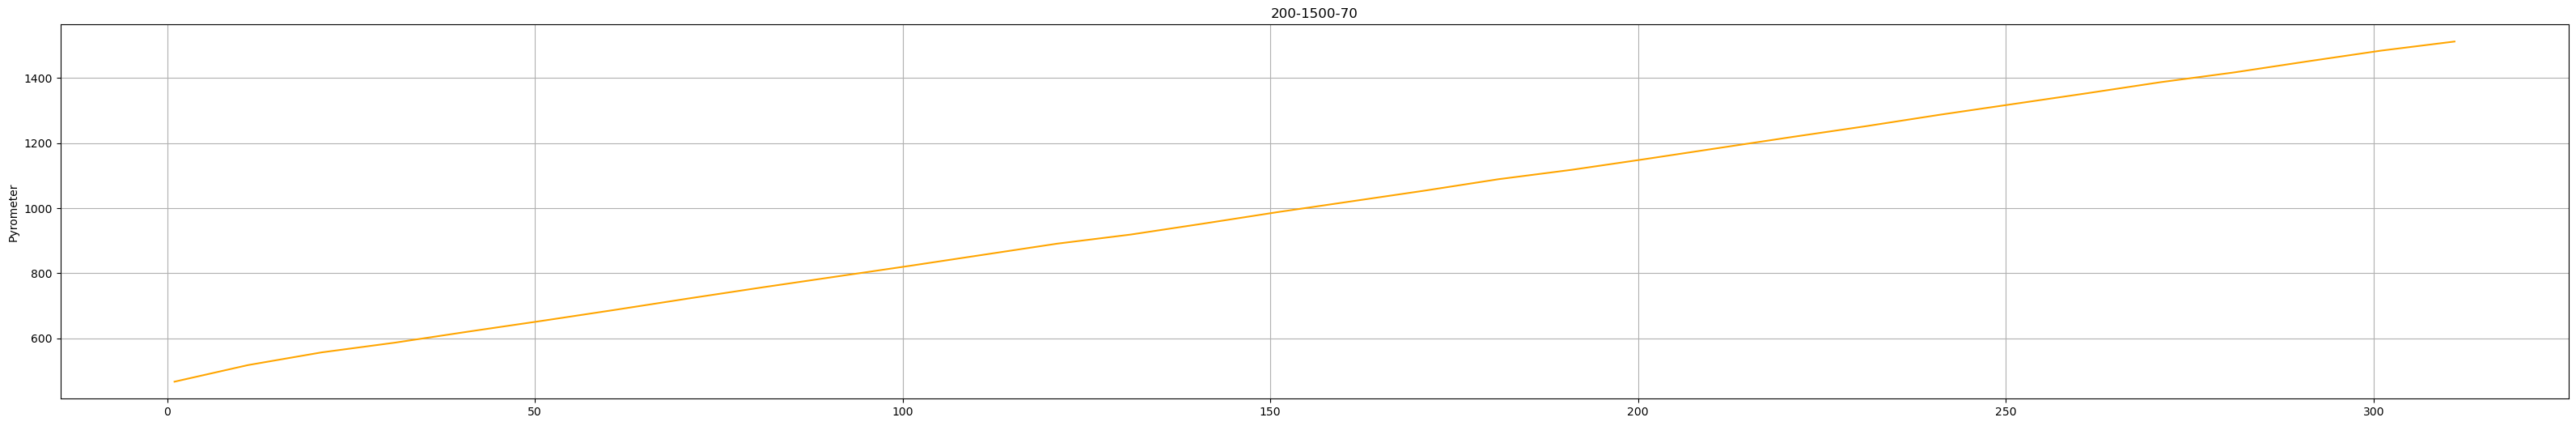

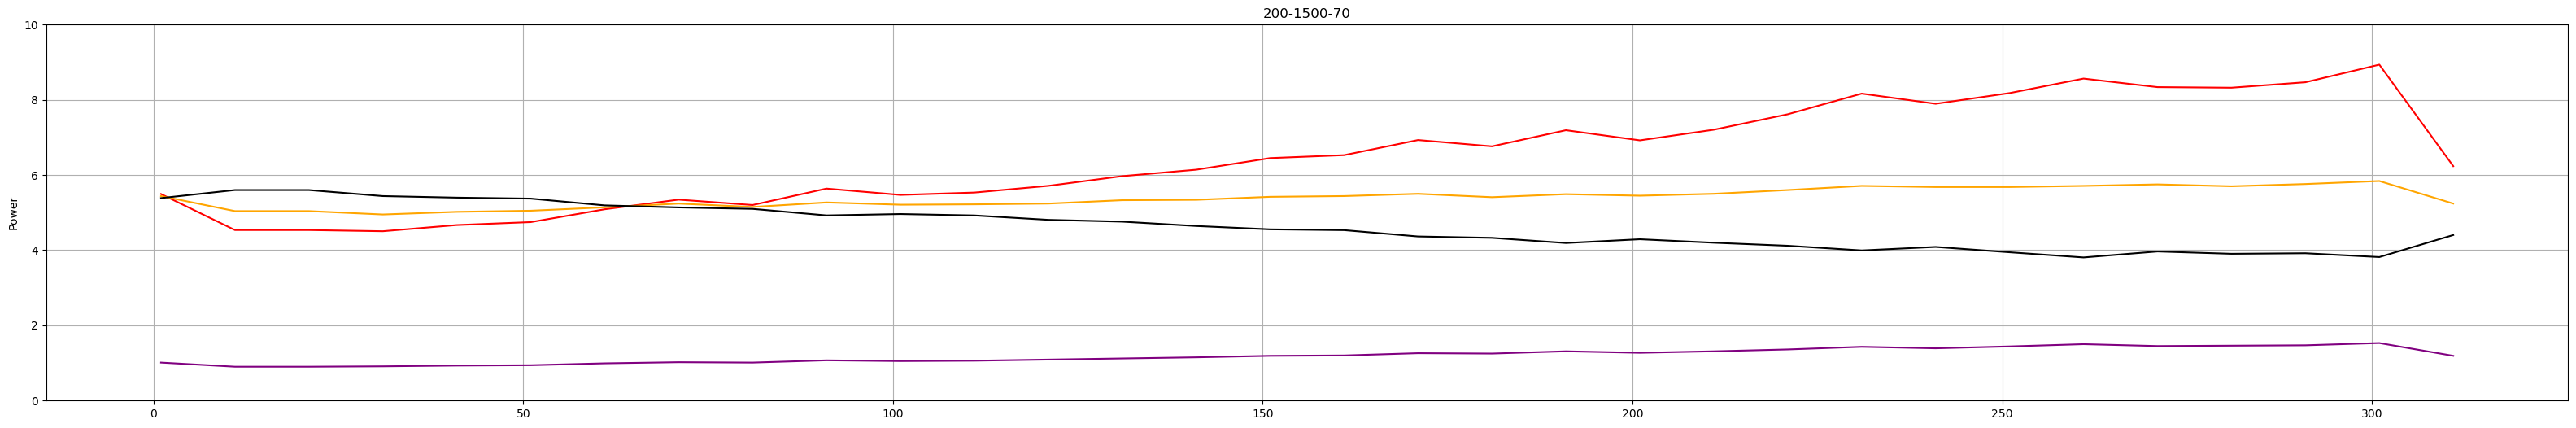

<Figure size 4000x600 with 0 Axes>

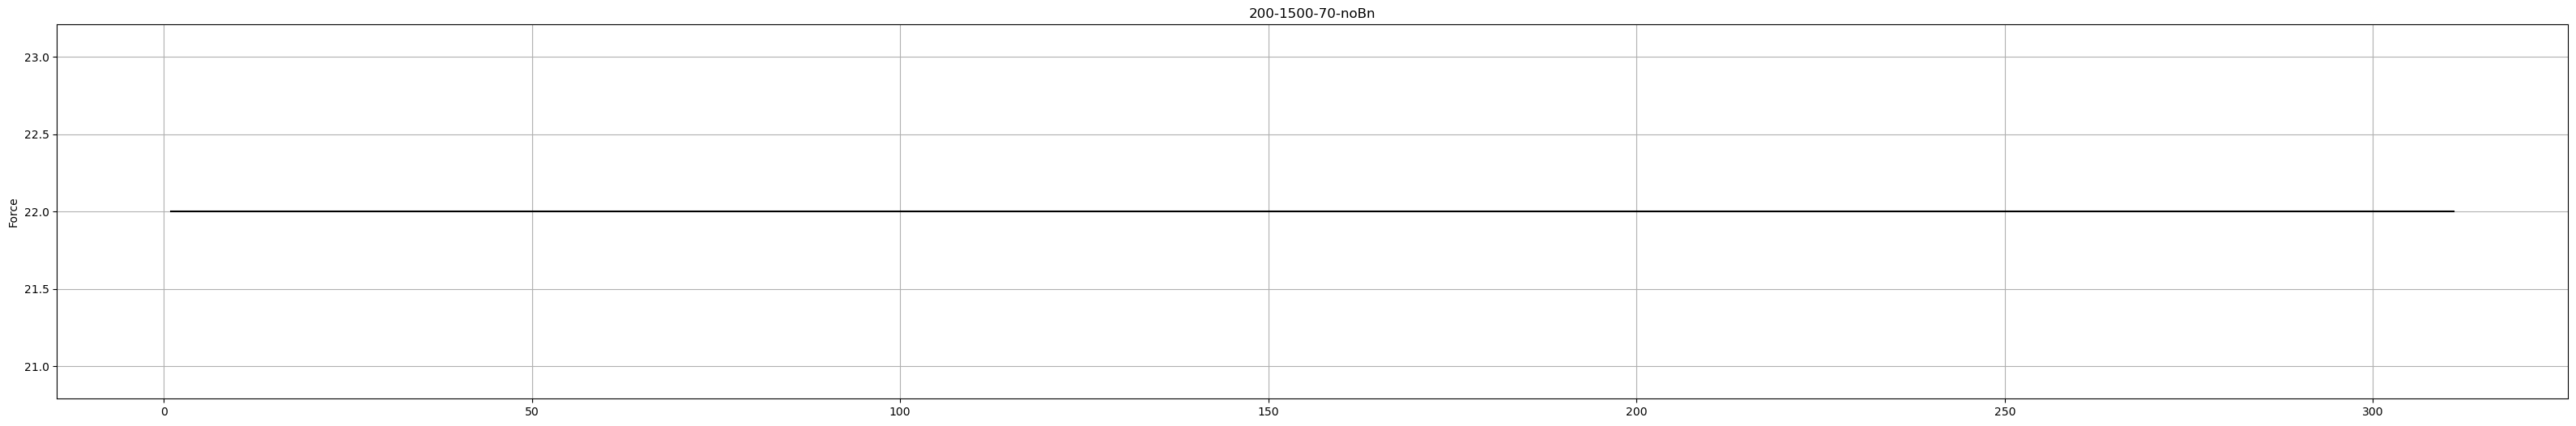

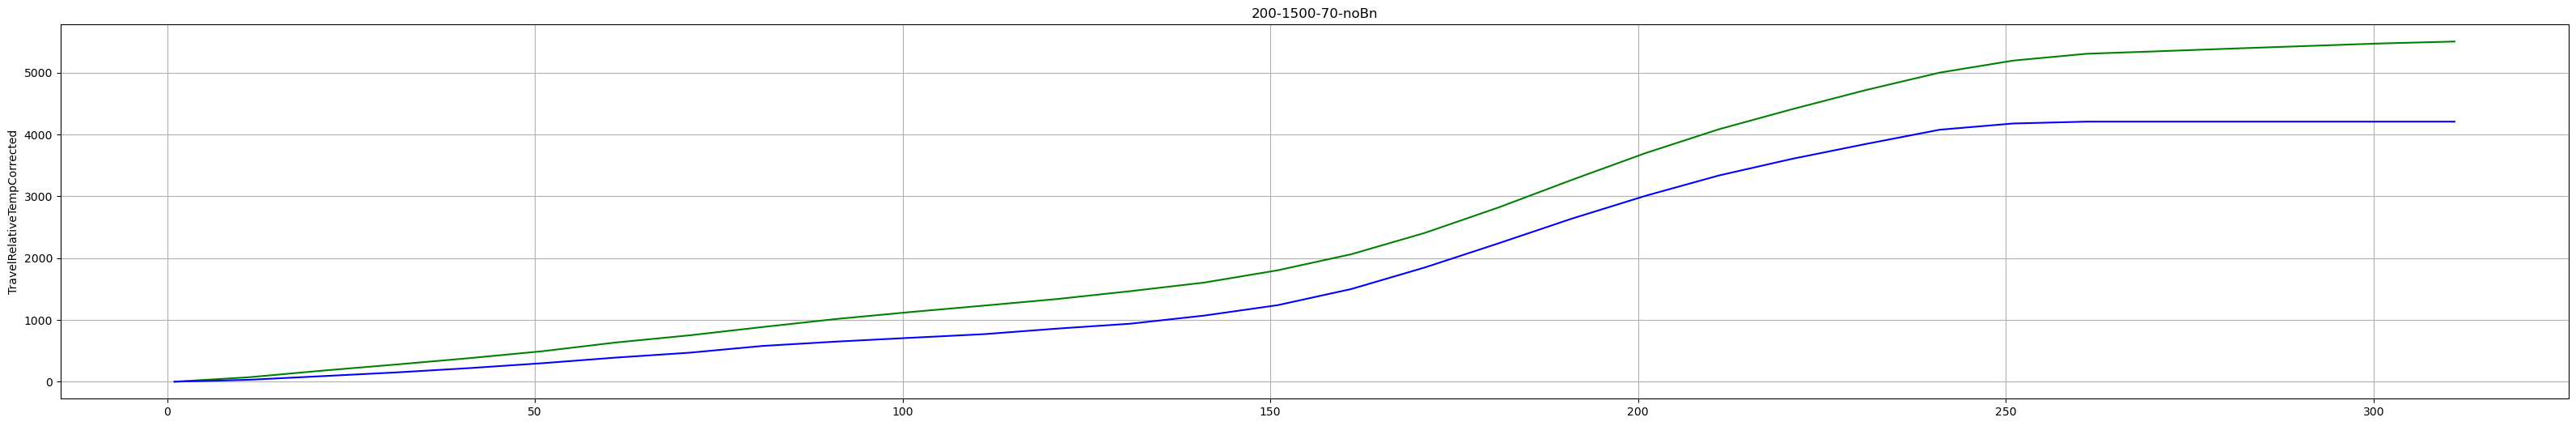

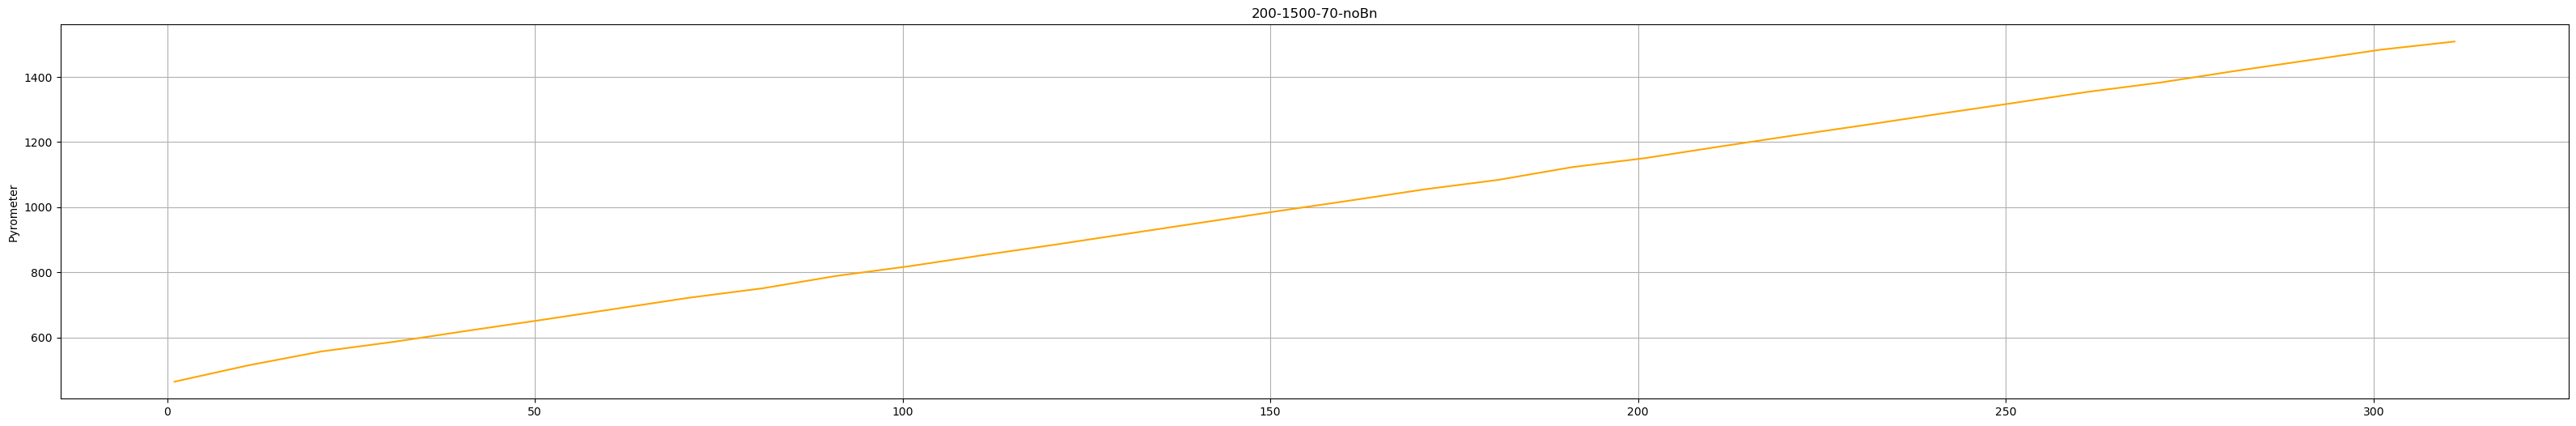

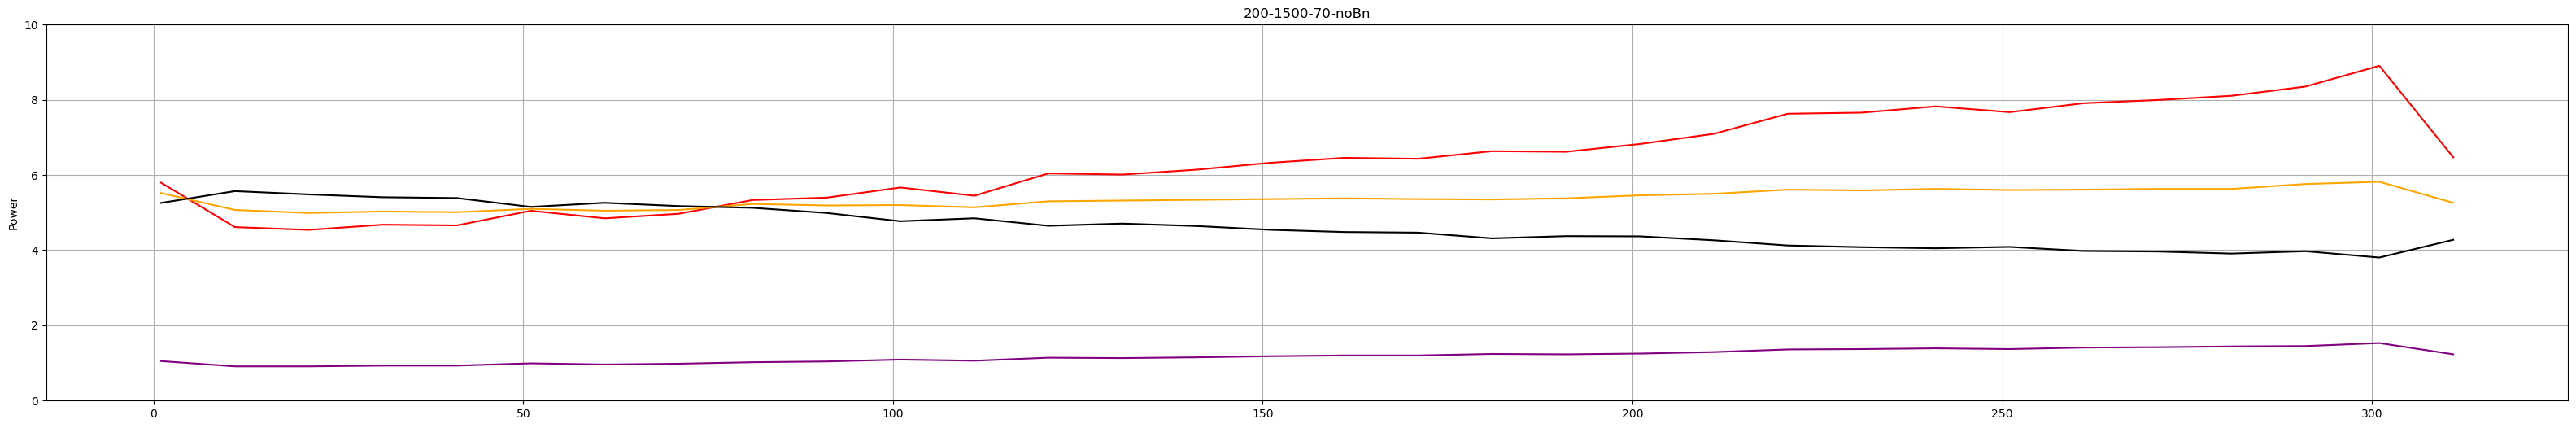

In [32]:
plot_data_Seconds(data100_1500_32, '100-1500-32')
plot_data_Seconds(data100_1500_32_ann, '100-1500-32-ann')
plot_data_Seconds(data100_1500_50, '100-1500-50')
plot_data_Seconds(data100_1500_70, '100-1500-70')
plot_data_Seconds(data200_1500_32, '200-1500-32')
plot_data_Seconds(data200_1600_50, '200-1600-50')
plot_data_Seconds(data200_1500_70, '200-1500-70')
plot_data_Seconds(data200_1500_70_noBn, '200-1500-70-noBn')

<Figure size 2000x600 with 0 Axes>

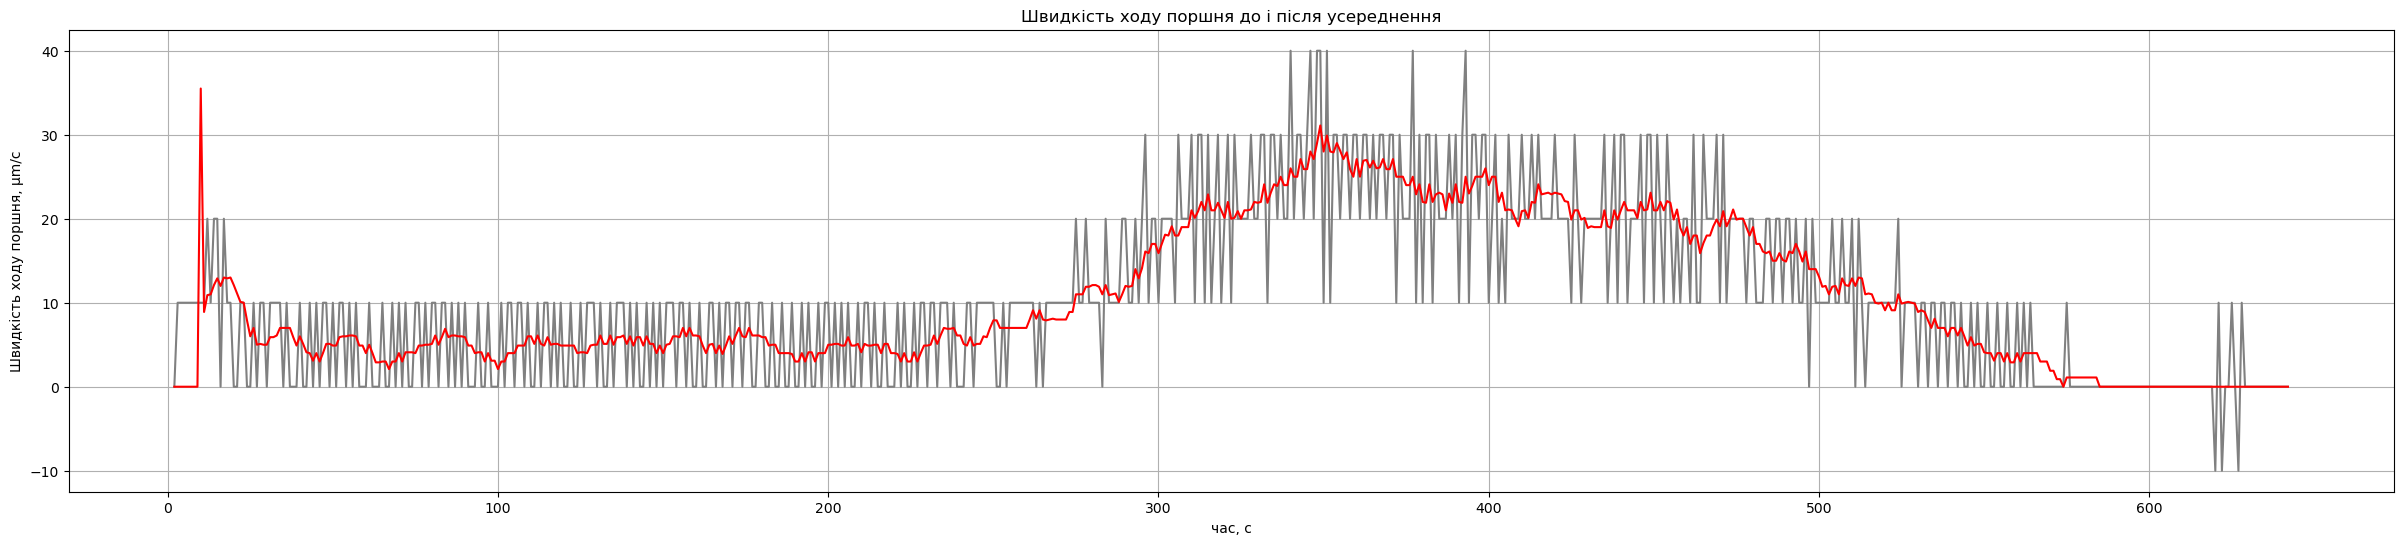

In [25]:

plt.figure(figsize=(20, 6))
fig, ax1 = plt.subplots( figsize=(30, 6))
#sc = ax1.plot(data900['seconds'], data900['TravelDelta'], color='red')  
#sc = ax1.plot(data1000['seconds'], data1000['TravelDelta'], color='green') 
sc = ax1.plot(data100_1500_32['seconds'], data100_1500_32['TravelDeltaOriginal']*1000, color='gray') 
sc = ax1.plot(data100_1500_32['seconds'], data100_1500_32['TravelDelta2'], color='red') 

##sc = ax1.plot(data1200['seconds'], data1200['TravelDelta'], color='green') 
#sc = ax1.plot(dataN1200['seconds'], dataN1200['TravelDelta'], color='purple') 
#sc = ax1.plot(dataN1100['seconds'], dataN1100['TravelDelta'], color='orange') 
#sc = ax1.plot(data1350['seconds'], data1350['TravelDelta'], color='black') 
#sc = plt.scatter(setToPlot['seconds'], setToPlot['Pyrometer'],color='red')  
#sc = plt.scatter(setToPlot['seconds'], setToPlot['Heating'], color='green') 
# Add color bar to show the color scale
ax1.set_ylabel('Швидкість ходу поршня, μm/с')
#ax1.set_ylim(400, 1000)
#ax1.set_xlim(300, 1400)
ax1.set_title('Швидкість ходу поршня до і після усереднення')
ax1.set_xlabel('час, с')
ax1.grid(True)
plt.show()

In [12]:
def plot_data_TravelDelta(data, title):
    setToPlot = data.copy()
    #setToPlot = setToPlot[(setToPlot['seconds'] > 0) & (setToPlot['seconds'] <650)].copy()
    #setToPlot = setToPlot[(setToPlot['Heating'] > 0)].copy()

    #setToPlot = setToPlot[(setToPlot['Pyrometer'] < 900)].copy()
    #setToPlot = setToPlot[(setToPlot['seconds'] < 850)].copy()

    # setToPlot['Heating'] = (setToPlot['Heating']*10).astype(int)
    plt.figure(figsize=(40, 6))
    fig, ax1 = plt.subplots( figsize=(40, 6))
    sc = ax1.plot(setToPlot['Pyrometer'], setToPlot['TravelDelta'], color='red')  
    #sc = ax1.plot(setToPlot['seconds'], setToPlot['TravelRelativeTempCorrectedShifted'], color='red')  
    #sc = ax1.plot(setToPlot['seconds'], setToPlot['TravelDelta'], color='green')  
    #sc = ax1.plot(setToPlot['Pyrometer'], setToPlot['AV Force']*10, color='blue')  
    # sc = ax1.plot(setToPlot['seconds'], setToPlot['Heating']) 
    #sc = plt.scatter(setToPlot['seconds'], setToPlot['Pyrometer'],color='red')  
    #sc = plt.scatter(setToPlot['seconds'], setToPlot['Heating'], color='green') 
    # ax2 = ax1.twinx()
    # sc2 = ax2.plot(setToPlot['seconds'], setToPlot['TravelDelta'], color='green')
    # Add color bar to show the color scale
    # ax2.set_ylim(0, 10)
    # ax2.set_ylabel('TravelDelta')
    ax1.set_ylabel('seconds, TravelDelta')
    # ax1.set_ylim(400, 1000)
    # ax1.set_xlim(300, 1400)
    # ax2.set_xlim(300, 1400)
    ax1.set_title(title)
    ax1.set_xlabel('seconds')
    ax1.grid(True)
    plt.show()

<Figure size 4000x600 with 0 Axes>

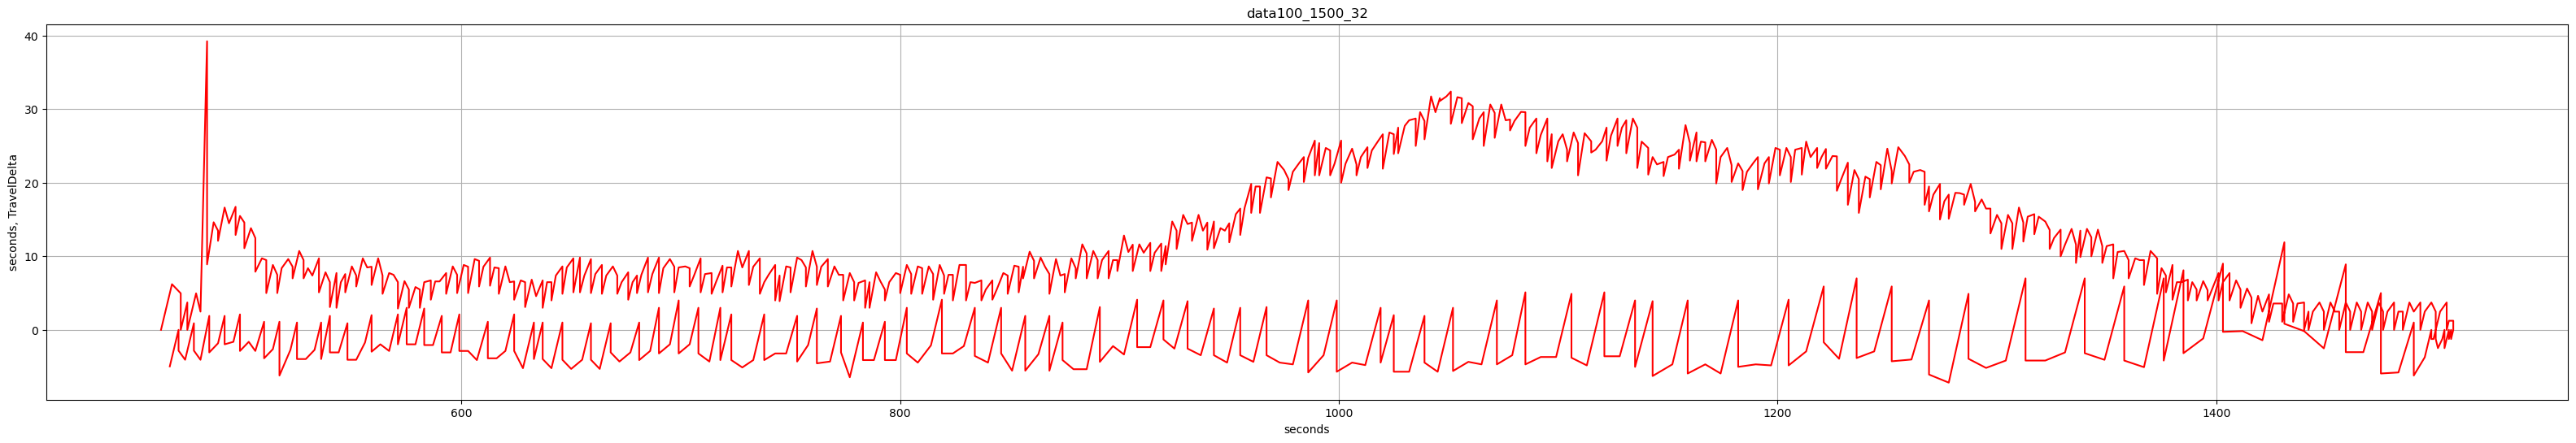

In [13]:
plot_data_TravelDelta(data100_1500_32, 'data100_1500_32')


In [87]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# plot_data_Seconds(data100_1500_32, '100-1500-32')
# plot_data_Seconds(data100_1500_32_ann, '100-1500-32-ann')
# plot_data_Seconds(data100_1500_50, '100-1500-50')
# plot_data_Seconds(data100_1500_70, '100-1500-70')
# plot_data_Seconds(data200_1500_32, '200-1500-32')
# plot_data_Seconds(data200_1600_50, '200-1600-50')
# plot_data_Seconds(data200_1500_70, '200-1500-70')
# plot_data_Seconds(data200_1500_70_noBn, '200-1500-70-noBn')

# Select the relevant columns
D = pd.concat( [data100_1500_32, data100_1500_32_ann,data100_1500_70,data200_1500_32,data200_1600_50,data200_1500_70,data200_1500_70_noBn], axis=0)

#TravelRelativeCorrectedShifted

#X_train = X[['seconds','Heating', 'Pyrometer', 'AV Force']]
X_train = D[['seconds','TravelRelativeTempCorrected', 'Pyrometer','PyrometerShifted','Force']]
#X_train = X[['seconds','Heating', 'Pyrometer']]
y_train = D['TravelRelativeTempCorrectedShifted']

 # Define the kernel for the GPR model
kernels = [
    C(1.0, (1e-4, 1e9)) * RBF(length_scale=1.0),
    C(1.0, (1e-4, 1e9)) * Matern(length_scale=1.0, nu=1.5),
    C(1.0, (1e-4, 1e9)) * RationalQuadratic(length_scale=1.0, alpha=0.1),
    C(1.0, (1e-4, 1e9)) * ExpSineSquared(length_scale=1.0, periodicity=3.0),
    C(1.0, (1e-4, 1e9)) * DotProduct(sigma_0=1.0)
]
kernel = kernels[2]

# Create and train the GPR model
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100, alpha=1e-3)
gpr.fit(X_train, y_train)

# Make predictions

#X_test = data1000[['seconds','Heating', 'Pyrometer', 'AV Force']]
X_test = data100_1500_50[['seconds','TravelRelativeTempCorrected', 'Pyrometer','PyrometerShifted','Force']]
#X_test = data1000[['seconds','Heating', 'Pyrometer']]
y_test = data100_1500_50['TravelRelativeTempCorrectedShifted']

y_pred = gpr.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the kernel parameters
print(f'Kernel parameters: {gpr.kernel_}')

Mean Squared Error: 3888.4156575041684
Kernel parameters: 6.56e+03**2 * RationalQuadratic(alpha=0.00052, length_scale=1.25e+03)


<Figure size 1500x600 with 0 Axes>

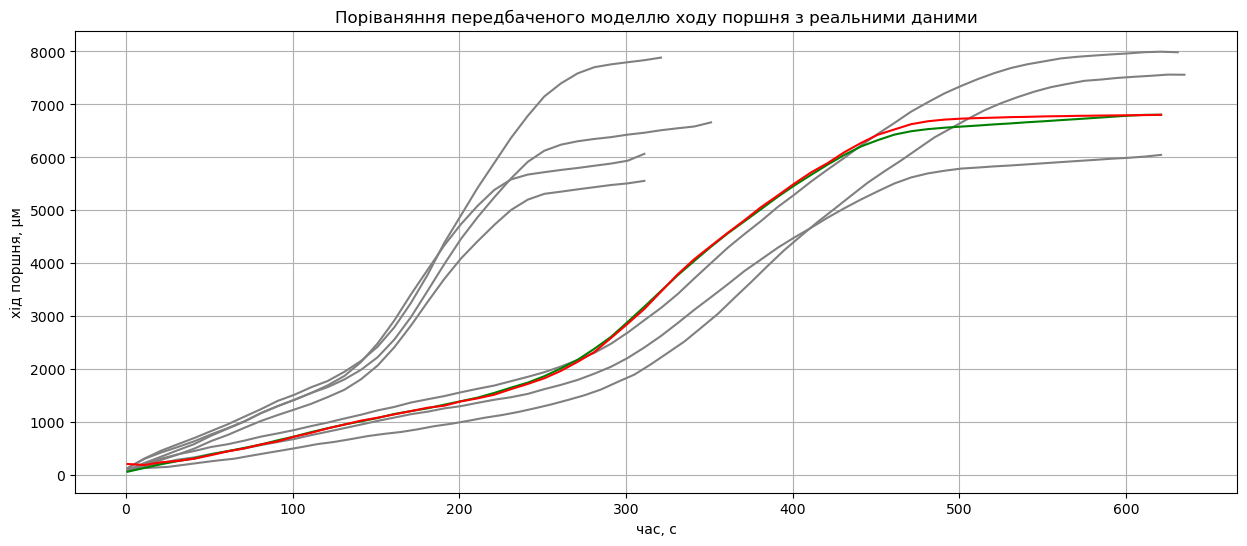

In [76]:
plt.figure(figsize=(15, 6))
fig, ax1 = plt.subplots( figsize=(15, 6))
data100_1500_32, data100_1500_32_ann,data100_1500_70,data200_1500_32,data200_1600_50,data200_1500_70,data200_1500_70_noBn
sc = ax1.plot(data100_1500_32['seconds'], data100_1500_32['TravelRelativeTempCorrectedShifted'], color='grey') 
sc = ax1.plot(data100_1500_32_ann['seconds'], data100_1500_32_ann['TravelRelativeTempCorrectedShifted'], color='grey') 
sc = ax1.plot(data100_1500_70['seconds'], data100_1500_70['TravelRelativeTempCorrectedShifted'], color='grey') 
sc = ax1.plot(data200_1500_32['seconds'], data200_1500_32['TravelRelativeTempCorrectedShifted'], color='grey') 
sc = ax1.plot(data200_1600_50['seconds'], data200_1600_50['TravelRelativeTempCorrectedShifted'], color='grey') 
sc = ax1.plot(data200_1500_70['seconds'], data200_1500_70['TravelRelativeTempCorrectedShifted'], color='grey') 
sc = ax1.plot(data200_1500_70_noBn['seconds'], data200_1500_70_noBn['TravelRelativeTempCorrectedShifted'], color='grey') 
sc = ax1.plot(data100_1500_50['seconds'], data100_1500_50['TravelRelativeTempCorrectedShifted'], color='green') 
sc = ax1.plot(X_test['seconds'], y_pred, color='red') 
#sc = plt.scatter(setToPlot['seconds'], setToPlot['Pyrometer'],color='red')  
#sc = plt.scatter(setToPlot['seconds'], setToPlot['Heating'], color='green') 
# Add color bar to show the color scale
#ax1.set_ylabel('Pyrometer, Heating')
#ax1.set_ylim(400, 1000)
#ax1.set_xlim(300, 1400)
ax1.set_title('Поріваняння передбаченого моделлю ходу поршня з реальними даними')
ax1.set_xlabel('час, с')
ax1.set_ylabel('хід поршня, μм')
ax1.grid(True)
plt.show()

In [81]:

PredictionSet = data200_1600_50.head(1)
PredictionSet = PredictionSet[['seconds','TravelRelativeTempCorrected', 'Pyrometer','PyrometerShifted','Force']]
PredictionSet = PredictionSet.reset_index(drop=True)
time = PredictionSet['seconds'].iloc[0]

newRegime = PredictionSet.copy()

heating = 1

print(PredictionSet)
while time < 4000 and ( heating == 1 or PredictionSet['PyrometerShifted'].iloc[0] > 1500) :
     TravelRelativeTempCorrectedPredicted = gpr.predict(PredictionSet, return_std=True); 
     #print(TravelRelativeTempCorrectedPredicted[0][0])
     if PredictionSet['PyrometerShifted'].iloc[0] > 1600:
           heating = 0
     time = time + 10
     PredictionSet.loc[0,'seconds'] = time
     PredictionSet.loc[0,'TravelRelativeTempCorrected'] = TravelRelativeTempCorrectedPredicted[0][0]
     PredictionSet.loc[0,'Pyrometer'] = PredictionSet['PyrometerShifted'].iloc[0]
     if heating:
          PredictionSet.loc[0,'PyrometerShifted'] = PredictionSet['PyrometerShifted'].iloc[0] + 35
     else:
          PredictionSet.loc[0,'PyrometerShifted'] = PredictionSet['PyrometerShifted'].iloc[0] -30
     #print(PredictionSet)
     newRegime = pd.concat([newRegime, PredictionSet], ignore_index=True)
     newRegime.at[newRegime.index[-1],'STD'] = TravelRelativeTempCorrectedPredicted[1][0]
#newRegime.head(100)

   seconds  TravelRelativeTempCorrected  Pyrometer  PyrometerShifted  Force
0        1                          0.0        463             492.0     16


In [ ]:
def calulate_TargetDensificationRateValue(value):
    if value < 0.40:
        return 1
    elif 0.40 <= value < 0.70:
        # Лінійне зростання від 0 до 110
        return ((value - 0.40) / (0.70 - 0.40) * 110)+1

    elif 0.70 <= value < 0.85:
        return 50
    elif 0.85 <= value < 0.97:
        # Лінійне зменшення від 50 до 0
        return (0.97 - value) / (0.97 - 0.85) * 50
    else:
        return 0

def calulate_TargetDensificationRate(column):
    result = []
    for value in column:
        result.append(calulate_TargetDensificationRateValue(value))
    return pd.Series(result, index=column.index)

def find_closest_index(column, target_value):
    squared_diff = (column - target_value) ** 2
    return squared_diff.idxmin()

#calulate_TargetDensificationRate(0.45)


In [ ]:


PredictionSet = data1000.head(1)
PredictionSet = PredictionSet[['seconds','TravelRelativeTempCorrected', 'Pyrometer','PyrometerShifted']]
PredictionSet = PredictionSet.reset_index(drop=True)
time = PredictionSet['seconds'].iloc[0]
numberOfOptions = 60
newRegime = PredictionSet.copy()
for i in range(0, numberOfOptions):
     PredictionSet = pd.concat([newRegime]*numberOfOptions, ignore_index=True)
heating = 1
#print(newRegime)

density=0
time = time + 10
for i in range(0, numberOfOptions):
     PredictionSet.loc[i,'seconds'] = time
     PredictionSet.loc[i,'PyrometerShifted'] = PredictionSet['PyrometerShifted'].iloc[i] + i-5

#print(PredictionSet)
while time < 1000 and (density<0.96 ) :
     
     TravelRelativeTempCorrectedPredicted = gpr.predict(PredictionSet, return_std=True); 
     #print(TravelRelativeTempCorrectedPredicted[0][0])
     #select best prediction
     
     densificationRate = ( TravelRelativeTempCorrectedPredicted[0]-PredictionSet['TravelRelativeTempCorrected'])/10/1000
     density = calulate_density(PredictionSet['TravelRelativeTempCorrected'].iloc[0])
     targetRate = calulate_TargetDensificationRateValue(density)
     predictedRates = pd.Series(TravelRelativeTempCorrectedPredicted[0]-PredictionSet.loc[0,'TravelRelativeTempCorrected'])
     #print(predictedRates)
     bestIndex = find_closest_index(predictedRates, targetRate)
     #print(targetRate)
     #print(bestIndex)
     time = time + 10
     for i in range(0, numberOfOptions):
          PredictionSet.loc[i,'seconds'] = time
          PredictionSet.loc[i,'TravelRelativeTempCorrected'] = TravelRelativeTempCorrectedPredicted[0][bestIndex]
          PredictionSet.loc[i,'Pyrometer'] = PredictionSet['PyrometerShifted'].iloc[bestIndex]
          if heating:
               PredictionSet.loc[i,'PyrometerShifted'] = PredictionSet['PyrometerShifted'].iloc[bestIndex] + i-20
          else:
               PredictionSet.loc[i,'PyrometerShifted'] = PredictionSet['PyrometerShifted'].iloc[bestIndex] -30
     #print(PredictionSet)
     bestPrediction = PredictionSet.iloc[bestIndex]
     bestPrediction = pd.DataFrame([bestPrediction])
     #print(bestPrediction)
     newRegime = pd.concat([newRegime, bestPrediction], ignore_index=True)
     #print(newRegime)
     newRegime.at[newRegime.index[-1],'STD'] = TravelRelativeTempCorrectedPredicted[1][bestIndex]
newRegime.head(10)

c:\Users\arros\miniconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
c:\Users\arros\miniconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
c:\Users\arros\miniconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
c:\Users\arros\miniconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
c:\Users\arros\miniconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
c:\Users\arros\miniconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:478: UserWarning: Predicted varia

,seconds,TravelRelativeTempCorrected,Pyrometer,PyrometerShifted,STD
0,1.0,0.0000,463.0,463.0,NaN
1,21.0,12.1875,492.0,506.0,0.006659
2,31.0,23.4375,506.0,520.0,0.003967
3,41.0,36.0000,518.0,530.0,0.004734
4,51.0,48.7500,527.0,536.0,0.005167
5,61.0,62.2500,535.0,543.0,0.004931
6,71.0,76.5000,543.0,551.0,0.004734
7,81.0,90.8750,550.0,557.0,0.004632
8,91.0,105.3750,557.0,564.0,0.005074
9,101.0,120.2500,564.0,571.0,0.004834


(-20.0, 40.0)

<Figure size 1500x600 with 0 Axes>

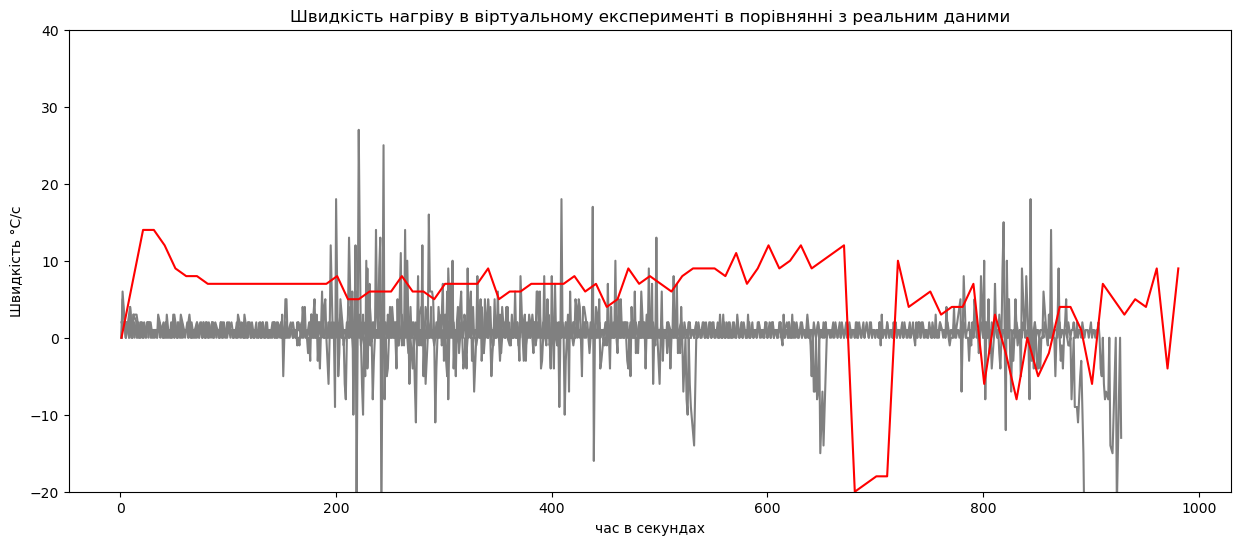

In [ ]:
plt.figure(figsize=(15, 6))
fig, ax1 = plt.subplots( figsize=(15, 6))
#heating rate
sc = ax1.plot(data1200['seconds'], data1200['PyrometerShifted'] - data1200['Pyrometer'], color='gray') 
sc = ax1.plot(data900['seconds'], data900['PyrometerShifted'] - data900['Pyrometer'], color='gray') 
sc = ax1.plot(data1000['seconds'], data1000['PyrometerShifted'] - data1000['Pyrometer'], color='gray') 
sc = ax1.plot(dataN1200['seconds'], dataN1200['PyrometerShifted'] - dataN1200['Pyrometer'], color='gray') 
sc = ax1.plot(newRegime['seconds'], newRegime['PyrometerShifted'] - newRegime['Pyrometer'], color='red') 
ax1.set_title('Швидкість нагріву в віртуальному експерименті в порівнянні з реальним даними')
ax1.set_xlabel('час в секундах')
ax1.set_ylabel('Швидкість °C/c')
ax1.set_ylim(-20, 40 )

NameError: name 'data1200' is not defined

<Figure size 1500x600 with 0 Axes>

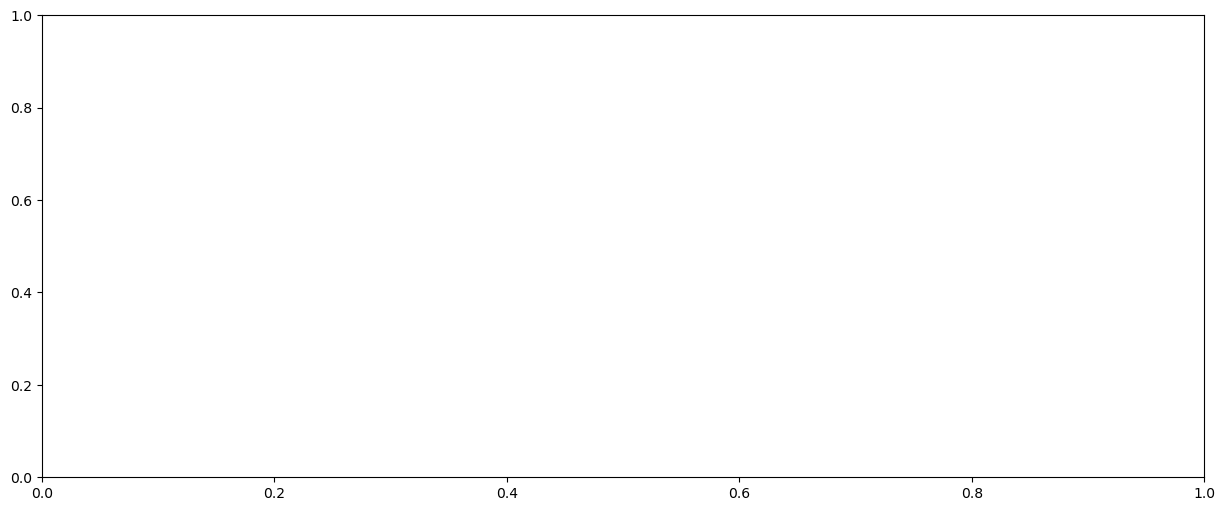

In [68]:
plt.figure(figsize=(15, 6))
fig, ax1 = plt.subplots( figsize=(15, 6))

#densification rate
sc = ax1.plot( calulate_density(data1200['TravelRelativeTempCorrected']), data1200['TravelRelativeTempCorrected'] - data1200['TravelRelativeTempCorrected'].shift(1), color='grey')
sc = ax1.plot( calulate_density(data1000['TravelRelativeTempCorrected']), data1000['TravelRelativeTempCorrected'] - data1000['TravelRelativeTempCorrected'].shift(1), color='grey')
sc = ax1.plot( calulate_density(data900['TravelRelativeTempCorrected']), data900['TravelRelativeTempCorrected'] - data900['TravelRelativeTempCorrected'].shift(1), color='grey')
sc = ax1.plot( calulate_density(dataN1200['TravelRelativeTempCorrected']), dataN1200['TravelRelativeTempCorrected'] - dataN1200['TravelRelativeTempCorrected'].shift(1), color='grey')
sc = ax1.plot( calulate_density(newRegime['TravelRelativeTempCorrected']), newRegime['TravelRelativeTempCorrected'] - newRegime['TravelRelativeTempCorrected'].shift(1), color='red')
sc = ax1.plot( calulate_density(newRegime['TravelRelativeTempCorrected']), calulate_TargetDensificationRate(calulate_density(newRegime['TravelRelativeTempCorrected'])), color='green')
# sc = ax1.plot(data1000['seconds'], data1000['TravelRelativeTempCorrected'], color='grey') 
# sc = ax1.plot(newRegime['seconds'], newRegime['TravelRelativeTempCorrected'], color='green') 
#sc = ax1.plot(newRegime['seconds'], newRegime['STD'], color='green') 

#densification rate
#sc = ax1.plot(data1200['seconds'], data1200['TravelRelativeTempCorrectedShifted']-data1200['TravelRelativeTempCorrected'], color='grey') 
#sc = ax1.plot(data1000['seconds'], data1000['TravelRelativeTempCorrectedShifted']-data1000['TravelRelativeTempCorrected'], color='grey') 
#sc = ax1.plot(newRegime['seconds'], newRegime['TravelRelativeTempCorrected'] - newRegime['TravelRelativeTempCorrected'].shift(1), color='green') 


#sc = ax1.plot(data1200['seconds'], data1200['PyrometerShifted'] - data1200['Pyrometer'].shift(1), color='orange') 
#sc = ax1.plot(data1350['seconds'], data1350['TravelRelativeTempCorrectedShifted'], color='grey') 
#sc = ax1.plot(data900['seconds'], data900['TravelRelativeTempCorrectedShifted']-data900['TravelRelativeTempCorrected'], color='grey') 
#sc = ax1.plot(dataN1200['seconds'], dataN1200['TravelRelativeTempCorrectedShifted']-dataN1200['TravelRelativeTempCorrected'], color='grey') 
#sc = ax1.plot(dataN1100['seconds'], dataN1100['TravelRelativeTempCorrectedShifted'], color='grey') 
#sc = ax1.plot(data1000['seconds'], data1000['TravelRelativeTempCorrectedShifted']-data1000['TravelRelativeTempCorrected'], color='grey') 
#sc = ax1.plot(newRegime['seconds'], newRegime['PyrometerShifted'] - newRegime['Pyrometer'].shift(1), color='red') 
# df['TravelDelta'] = df['TravelRelativeTempCorrected'] - df['TravelRelativeTempCorrected'].shift(1)
 

#ax1.set_title('title')
ax1.set_xlabel('Щільність')
ax1.set_ylabel('Швидкість ущільнення')
ax1.grid(True)
plt.show()

<Figure size 1500x600 with 0 Axes>

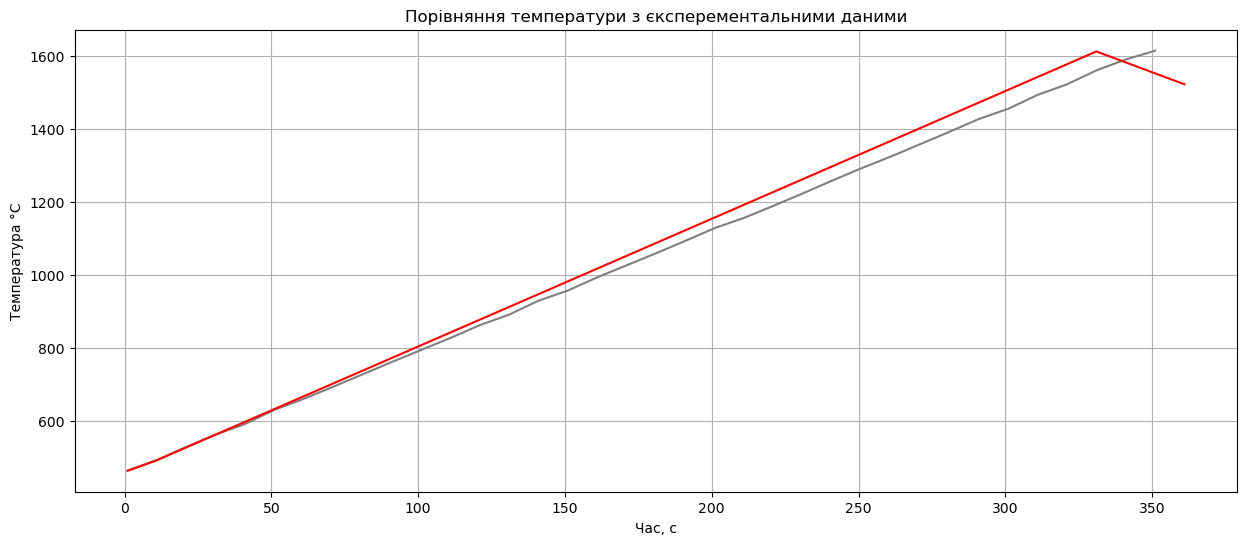

In [82]:
plt.figure(figsize=(15, 6))
fig, ax1 = plt.subplots( figsize=(15, 6))

#Temperature
sc = ax1.plot(data200_1600_50['seconds'], data200_1600_50['Pyrometer'], color='grey')
sc = ax1.plot(newRegime['seconds'], newRegime['Pyrometer'], color='red')

ax1.set_title('Порівняння температури з єксперементальними даними')
ax1.set_xlabel('Час, с')
ax1.set_ylabel('Температура °C')
ax1.grid(True)
plt.show()

<Figure size 1500x600 with 0 Axes>

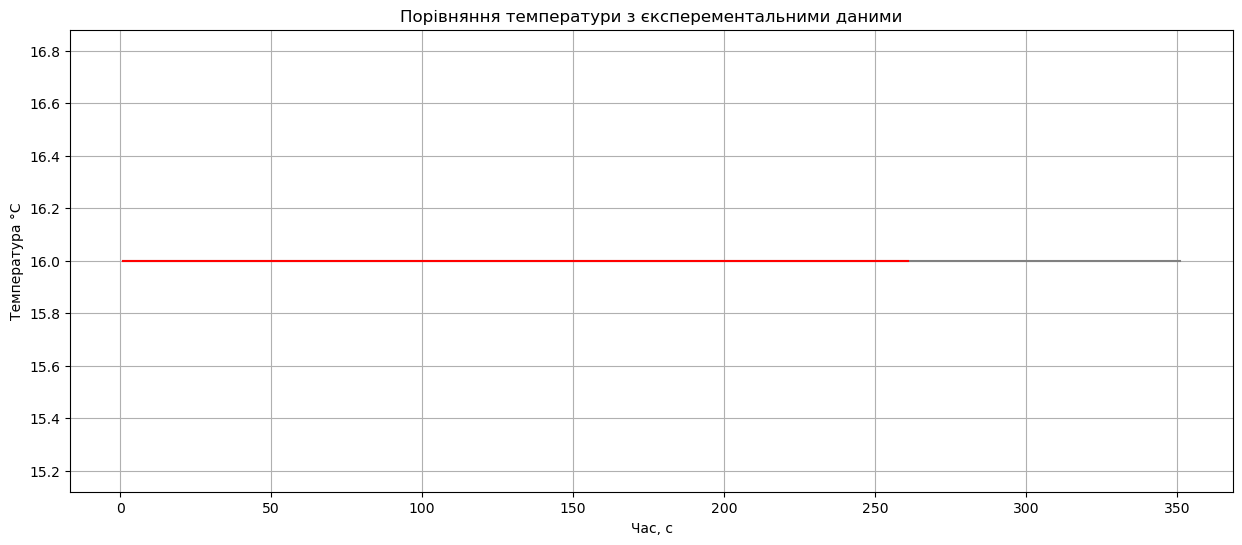

In [62]:
plt.figure(figsize=(15, 6))
fig, ax1 = plt.subplots( figsize=(15, 6))

#Temperature
sc = ax1.plot(data200_1600_50['seconds'], data200_1600_50['Force'], color='grey')
sc = ax1.plot(newRegime['seconds'], newRegime['Force'], color='red')

ax1.set_title('Порівняння температури з єксперементальними даними')
ax1.set_xlabel('Час, с')
ax1.set_ylabel('Температура °C')
ax1.grid(True)
plt.show()

<Figure size 1500x600 with 0 Axes>

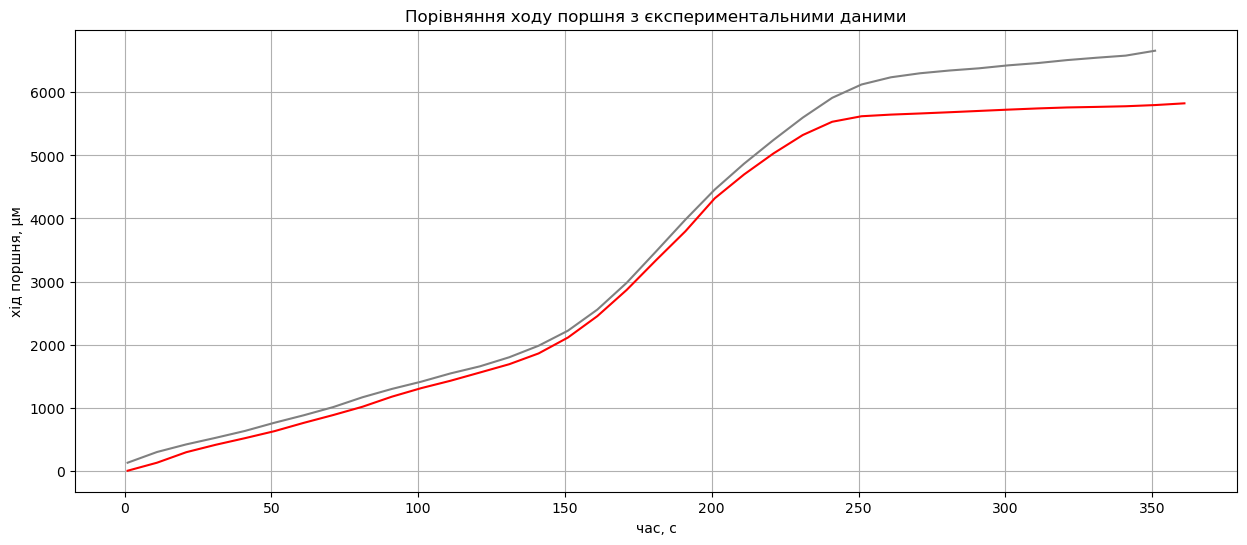

In [83]:
plt.figure(figsize=(15, 6))
fig, ax1 = plt.subplots( figsize=(15, 6))

sc = ax1.plot(data200_1600_50['seconds'], data200_1600_50['TravelRelativeTempCorrectedShifted'], color='grey') 
sc = ax1.plot(newRegime['seconds'], newRegime['TravelRelativeTempCorrected'], color='red') 
 
ax1.set_title('Порівняння ходу поршня з єкспериментальними даними')
ax1.set_xlabel('час, с')
ax1.set_ylabel('хід поршня, μм')
ax1.grid(True)
plt.show()

<Figure size 4000x600 with 0 Axes>

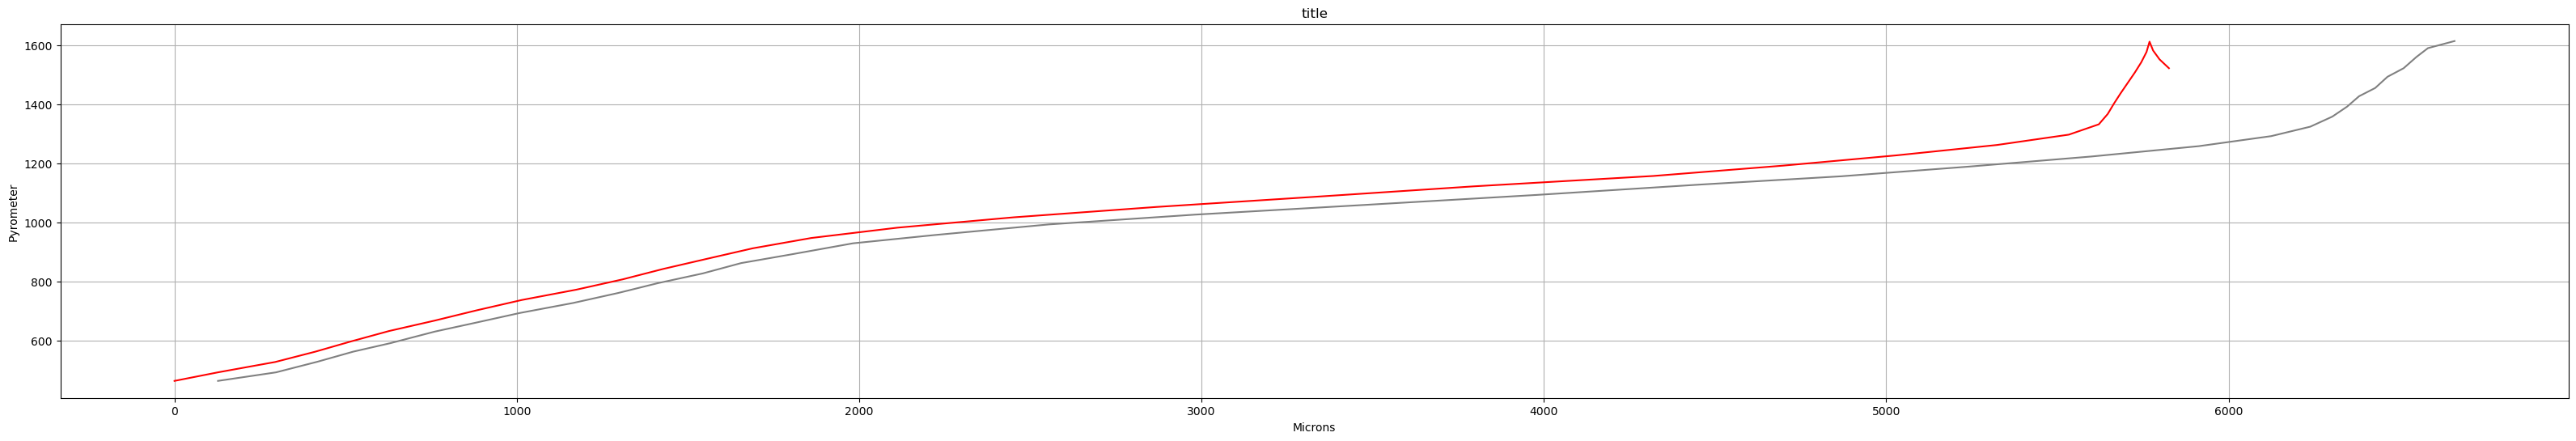

In [84]:
plt.figure(figsize=(40, 6))
fig, ax1 = plt.subplots( figsize=(40, 6))

sc = ax1.plot(data200_1600_50['TravelRelativeTempCorrectedShifted'], data200_1600_50['Pyrometer'], color='grey') 
sc = ax1.plot(newRegime['TravelRelativeTempCorrected'], newRegime['Pyrometer'], color='red') 
 

ax1.set_title('title')
ax1.set_xlabel('Microns')
ax1.set_ylabel('Pyrometer')
ax1.grid(True)
plt.show()

<Figure size 4000x600 with 0 Axes>

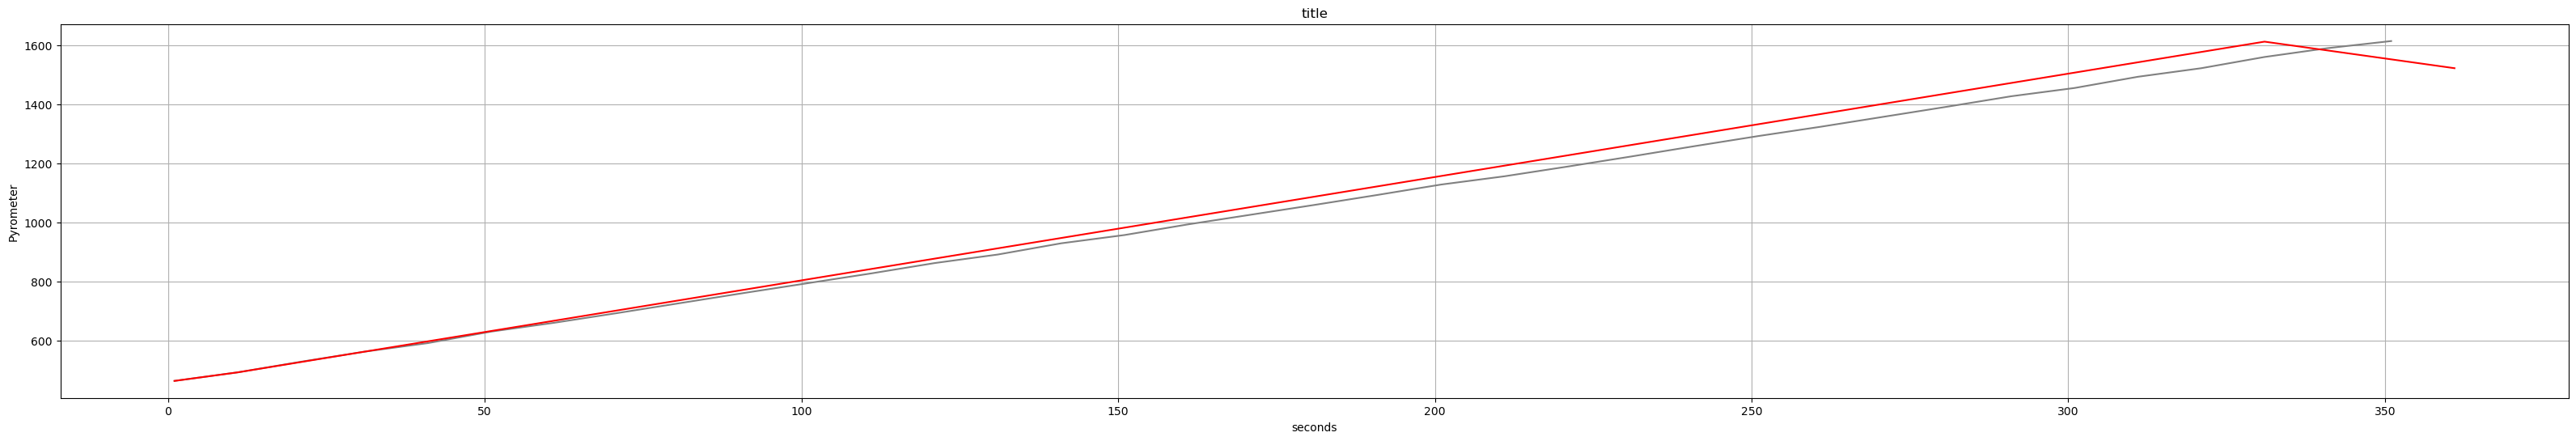

In [85]:
plt.figure(figsize=(40, 6))
fig, ax1 = plt.subplots( figsize=(40, 6))

sc = ax1.plot(data200_1600_50['seconds'], data200_1600_50['Pyrometer'], color='grey') 
#sc = ax1.plot(dataN1100['seconds'], dataN1100['Pyrometer'], color='grey') 
sc = ax1.plot(newRegime['seconds'], newRegime['Pyrometer'], color='red') 
 

ax1.set_title('title')
ax1.set_xlabel('seconds')
ax1.set_ylabel('Pyrometer')
ax1.grid(True)
plt.show()